# Unit 12 – Data Visualization & Reporting

## 🎯 Learning Objectives

By the end of this unit, you will be able to:

1. Understand the fundamentals of data visualization and why it matters
2. Create various types of plots using **Matplotlib**
3. Build beautiful statistical visualizations with **Seaborn**
4. Choose the appropriate chart type for different data scenarios
5. Tell compelling stories with data through effective visualization

---

## 📚 Table of Contents

1. [Visualization Fundamentals](#1-visualization-fundamentals)
2. [Matplotlib Basics](#2-matplotlib-basics)
3. [Seaborn Overview](#3-seaborn-overview)
4. [Choosing the Right Chart](#4-choosing-the-right-chart)
5. [Storytelling with Data](#5-storytelling-with-data)
6. [Practice Projects](#6-practice-projects)

## 📦 Required Libraries

Before we begin, let's import the libraries we'll use throughout this tutorial:

| Library | Purpose |
|---------|---------|
| `matplotlib.pyplot` | Core plotting library - the foundation of Python visualization |
| `seaborn` | Statistical visualization with beautiful defaults |
| `pandas` | Data manipulation and analysis |
| `numpy` | Numerical computing |
| `scipy.stats` | Statistical functions (for KDE curves) |

### 🎨 Style Configuration

We also configure some defaults:
- **`plt.style.use('seaborn-v0_8-whitegrid')`** - Clean style with subtle gridlines
- **`sns.set_palette("husl")`** - Visually distinct color palette
- **`plt.rcParams['figure.figsize']`** - Default figure size
- **`plt.rcParams['figure.dpi']`** - Resolution (100 = good for screens)

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter

# Configure default settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 📊 Why Visualization Matters: Anscombe's Quartet

**Anscombe's Quartet** is a famous dataset that demonstrates why we must **always visualize data** - statistics alone can be misleading!

### The Surprise

All four datasets in Anscombe's Quartet have:
- Same mean of X and Y
- Same variance of X and Y  
- Same correlation coefficient
- Same linear regression line

**But they look completely different!** Let's prove it:

In [2]:
# Load the famous Anscombe's Quartet dataset
anscombe = sns.load_dataset('anscombe')

# Calculate statistics for each dataset
summary = anscombe.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std']
}).round(2)

print("📊 Statistical Summary of All Four Datasets:")
print(summary)
print("\n💡 Notice: The statistics are nearly IDENTICAL!")

📊 Statistical Summary of All Four Datasets:
           x          y      
        mean   std mean   std
dataset                      
I        9.0  3.32  7.5  2.03
II       9.0  3.32  7.5  2.03
III      9.0  3.32  7.5  2.03
IV       9.0  3.32  7.5  2.03

💡 Notice: The statistics are nearly IDENTICAL!


In [3]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### 👀 Now Let's Visualize!

Despite identical statistics, watch what happens when we plot the data:

/tmp/ipykernel_86003/916370456.py:26: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


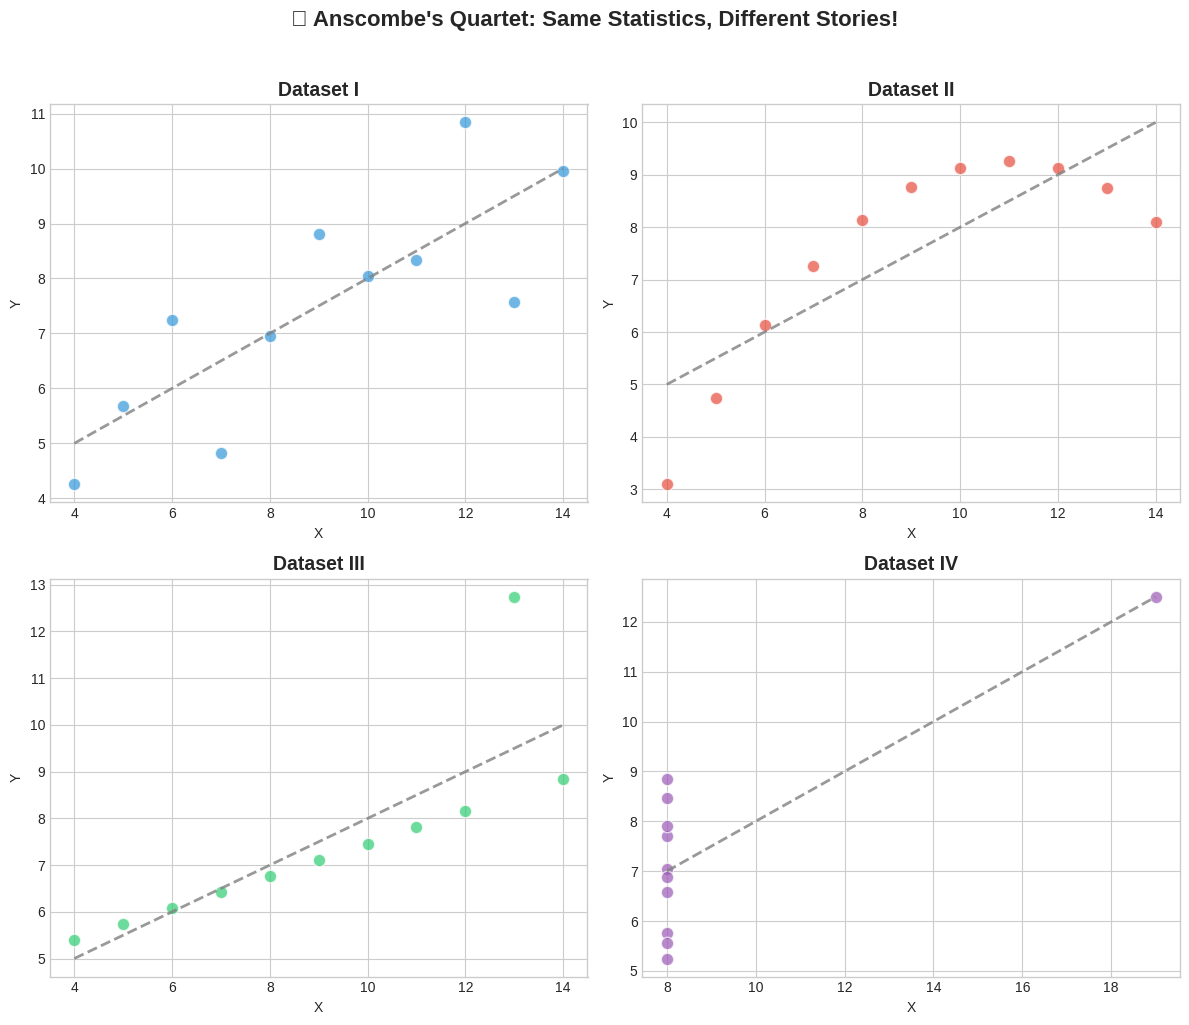

In [4]:
# Create 2x2 grid for the four datasets
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

datasets = ['I', 'II', 'III', 'IV']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for ax, dataset, color in zip(axes, datasets, colors):
    data = anscombe[anscombe['dataset'] == dataset]
    
    # Scatter plot
    ax.scatter(data['x'], data['y'], s=80, alpha=0.7, color=color, edgecolors='white')
    
    # Add regression line
    z = np.polyfit(data['x'], data['y'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(data['x'].min(), data['x'].max(), 100)
    ax.plot(x_line, p(x_line), '--', color='gray', linewidth=2, alpha=0.8)
    
    ax.set_title(f'Dataset {dataset}', fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

fig.suptitle("🎯 Anscombe's Quartet: Same Statistics, Different Stories!", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 🎓 Key Lesson

| Dataset | What It Shows |
|---------|---------------|
| **I** | Linear relationship (statistics work!) |
| **II** | Non-linear relationship (curved) |
| **III** | Linear with one outlier |
| **IV** | No relationship + one extreme point |

> **💡 Takeaway:** Never trust statistics alone. **Always visualize your data!**

---

# 2. Matplotlib Basics

**Matplotlib** is the foundational plotting library in Python. Before diving into chart types, let's understand **how matplotlib works**.

---

## 🚀 2.1 Your First Plot

The simplest way to create a plot is using the **pyplot interface** — just call `plt.plot()` and matplotlib handles everything automatically.

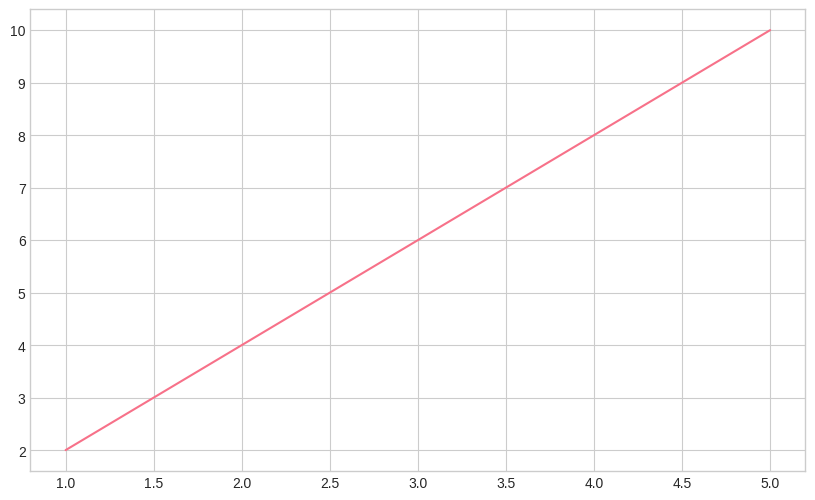

In [5]:
# The simplest possible plot
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.show()

That's it! With just two lines of data and `plt.plot()`, you have a working visualization.

Now let's **add some customization** — a title and axis labels:

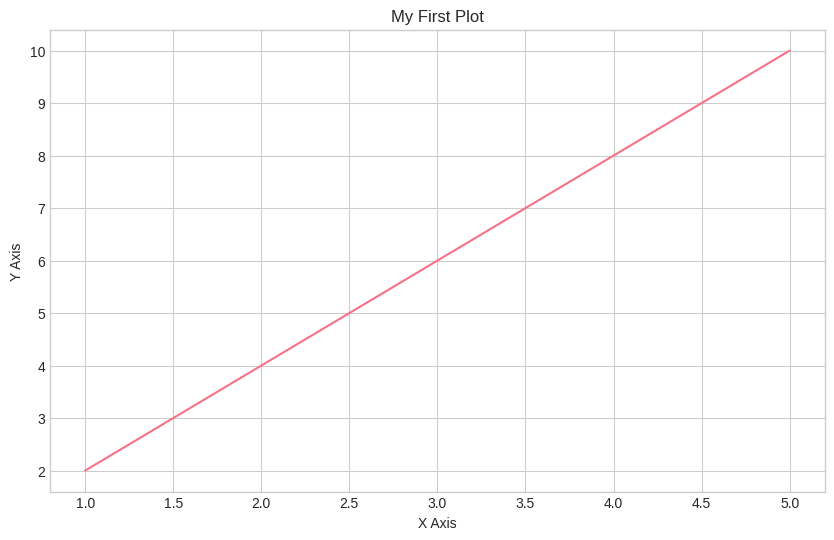

In [6]:
# Adding a title and labels
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.title("My First Plot")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

Let's **customize the line** — change its color, style, and add markers:

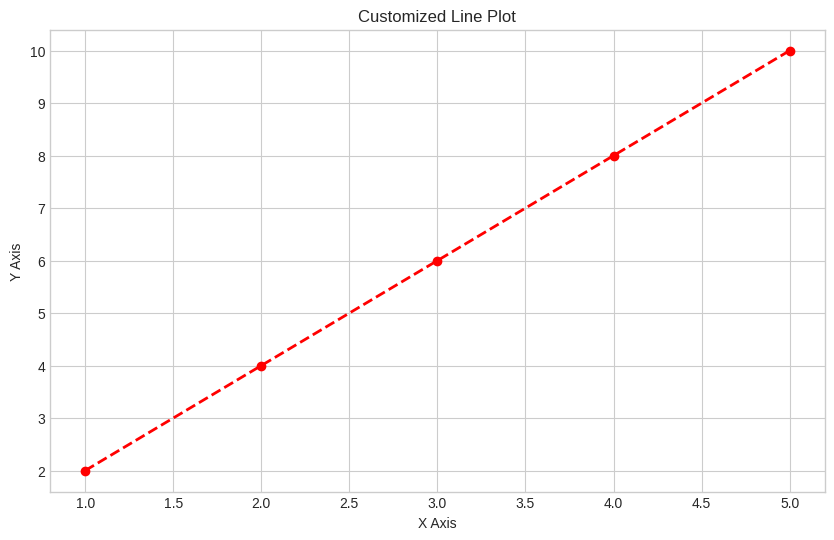

In [7]:
# Customizing the line
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, color='red', linestyle='--', marker='o', linewidth=2)
plt.title("Customized Line Plot")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

Great! You've learned the **pyplot interface**. It's quick and easy for simple plots.

But what if you need **more control**? What if you want **multiple plots** in one figure? That's where the **Object-Oriented (OOP) approach** comes in.

---

## 🏗️ 2.2 Understanding `fig` and `ax`

In matplotlib, every plot consists of two main objects:

| Object | What It Is | Analogy |
|--------|------------|---------|
| **`fig` (Figure)** | The entire window/canvas | The whole piece of paper |
| **`ax` (Axes)** | One individual plot area | A single drawing on the paper |

Think of it like this:
- A **Figure** is like a **blank canvas** or page
- An **Axes** is like a **single chart** drawn on that canvas
- You can have **multiple Axes** (charts) on one Figure

### Creating Figure and Axes

```python
fig, ax = plt.subplots()   # Creates 1 figure with 1 axes
```

This single line does two things:
1. Creates a Figure (the canvas)
2. Creates an Axes (the plot area) and places it on the Figure

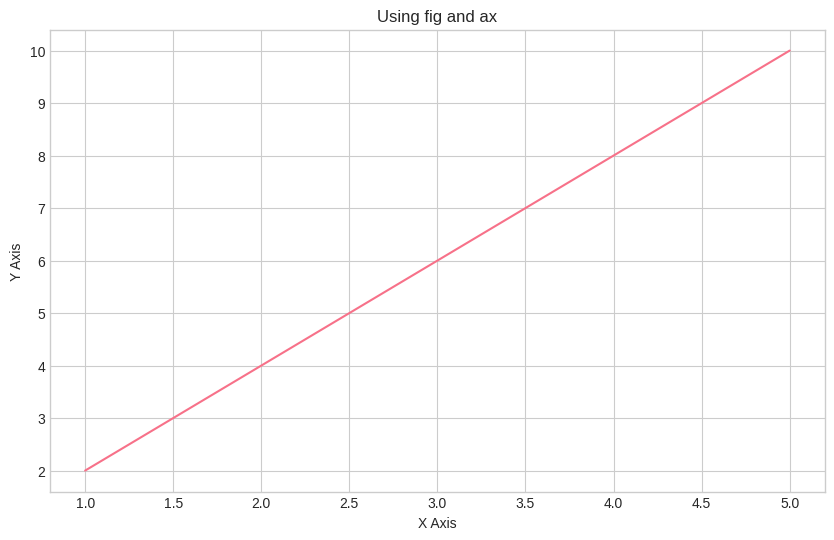

In [8]:
# The OOP approach: using fig and ax
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

fig, ax = plt.subplots()      # Create figure and axes

ax.plot(x, y)                  # Plot on the axes (not plt!)
ax.set_title("Using fig and ax")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")

plt.show()

### 🖼️ What Can `fig` Do?

While `ax` controls **what's inside the plot**, `fig` controls **the whole canvas**:

| `fig` Methods | What It Does |
|---------------|--------------|
| `fig.suptitle()` | Add a main title above all plots |
| `fig.set_size_inches()` | Change the figure size |
| `fig.tight_layout()` | Adjust spacing to prevent overlap |
| `fig.savefig()` | Save the figure to a file |

Let's see `fig` in action:

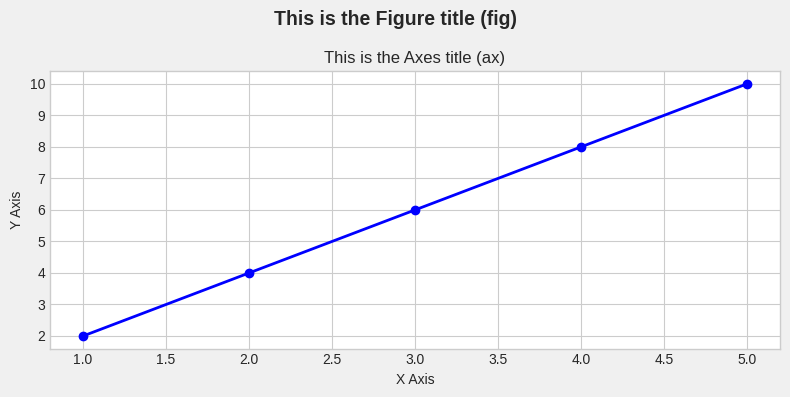

In [9]:
# Demonstrating fig vs ax responsibilities
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

fig, ax = plt.subplots()

# fig controls the canvas
fig.set_size_inches(8, 4)              # Change figure size
fig.set_facecolor('#f0f0f0')           # Background color of the canvas

# ax controls the plot content
ax.plot(x, y, color='blue', marker='o', linewidth=2)
ax.set_title("This is the Axes title (ax)")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_facecolor('white')              # Background of the plot area

# fig can add a super-title above everything
fig.suptitle("This is the Figure title (fig)", fontsize=14, fontweight='bold')

fig.tight_layout()                      # Adjust spacing
plt.show()

Notice the **two titles**:
- **Figure title** (`fig.suptitle`) — sits above the entire canvas
- **Axes title** (`ax.set_title`) — belongs to the individual plot

This becomes even more useful with **multiple subplots**, where each `ax` has its own title, but `fig` provides **one main title** for all:

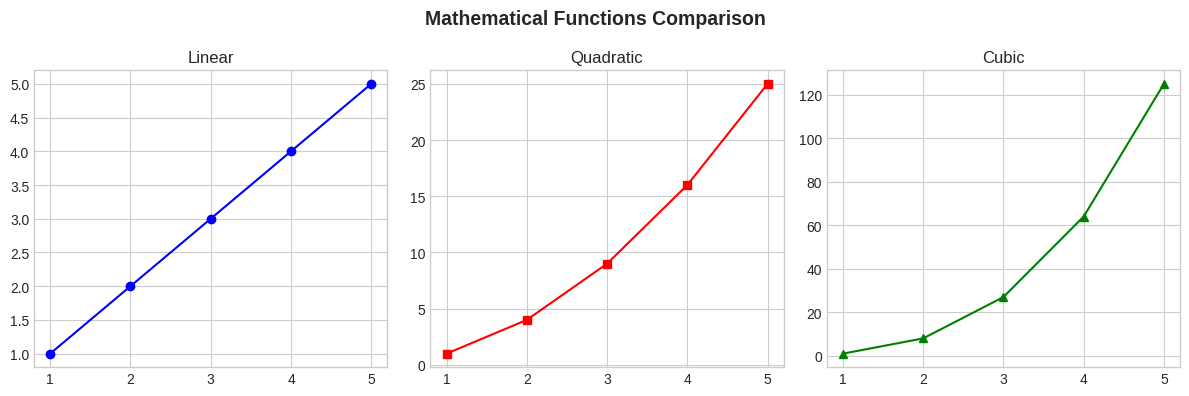

In [10]:
# fig.suptitle shines with multiple subplots
x = [1, 2, 3, 4, 5]

# Create 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Each ax gets its own title
axes[0].plot(x, [1, 2, 3, 4, 5], 'b-o')
axes[0].set_title("Linear")

axes[1].plot(x, [1, 4, 9, 16, 25], 'r-s')
axes[1].set_title("Quadratic")

axes[2].plot(x, [1, 8, 27, 64, 125], 'g-^')
axes[2].set_title("Cubic")

# fig provides ONE main title for all plots
fig.suptitle("Mathematical Functions Comparison", fontsize=14, fontweight='bold')

fig.tight_layout()
plt.show()

### ⚡ Notice the Difference!

| Pyplot Interface | OOP Interface |
|------------------|---------------|
| `plt.plot(x, y)` | `ax.plot(x, y)` |
| `plt.title("...")` | `ax.set_title("...")` |
| `plt.xlabel("...")` | `ax.set_xlabel("...")` |
| `plt.ylabel("...")` | `ax.set_ylabel("...")` |

In the OOP approach, we call methods on the **`ax` object** instead of `plt`.

---

### 🎯 Why Use the OOP Approach?

The OOP approach becomes essential when you need:

1. **Multiple plots in one figure** (subplots)
2. **Fine-grained control** over individual plot elements
3. **Reusable code** in functions

Let's see the real power — **multiple plots in one figure**:

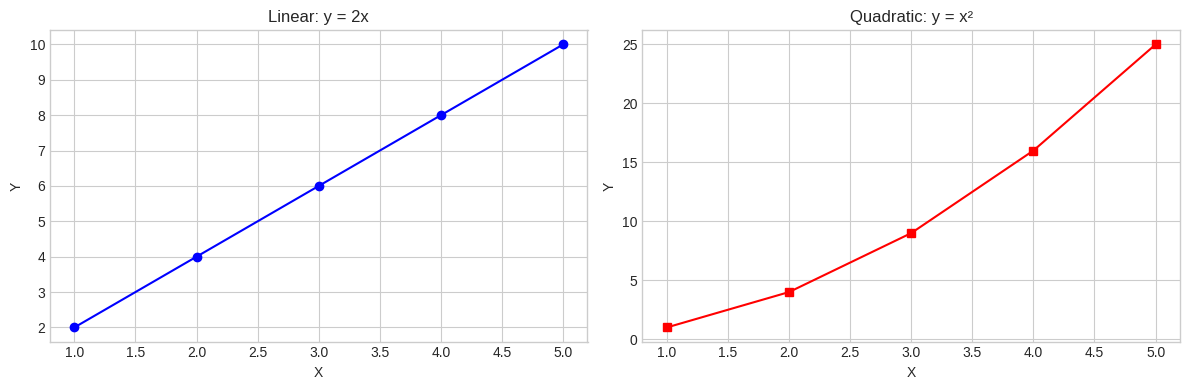

In [11]:
# Multiple plots with subplots (1 row, 2 columns)
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 4, 9, 16, 25]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# First plot (left)
axes[0].plot(x, y1, color='blue', marker='o')
axes[0].set_title("Linear: y = 2x")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Second plot (right)
axes[1].plot(x, y2, color='red', marker='s')
axes[1].set_title("Quadratic: y = x²")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")

plt.tight_layout()  # Prevents overlapping
plt.show()

### 📐 Understanding `plt.subplots(rows, cols)`

```python
fig, axes = plt.subplots(rows, cols, figsize=(width, height))
```

| Code | Creates |
|------|---------|
| `plt.subplots()` | 1 plot |
| `plt.subplots(1, 2)` | 2 plots side by side |
| `plt.subplots(2, 1)` | 2 plots stacked vertically |
| `plt.subplots(2, 2)` | 4 plots in a 2×2 grid |

When you have multiple axes, they come as an **array**:
- `axes[0]` → first plot
- `axes[1]` → second plot

Let's try a **2×2 grid**:

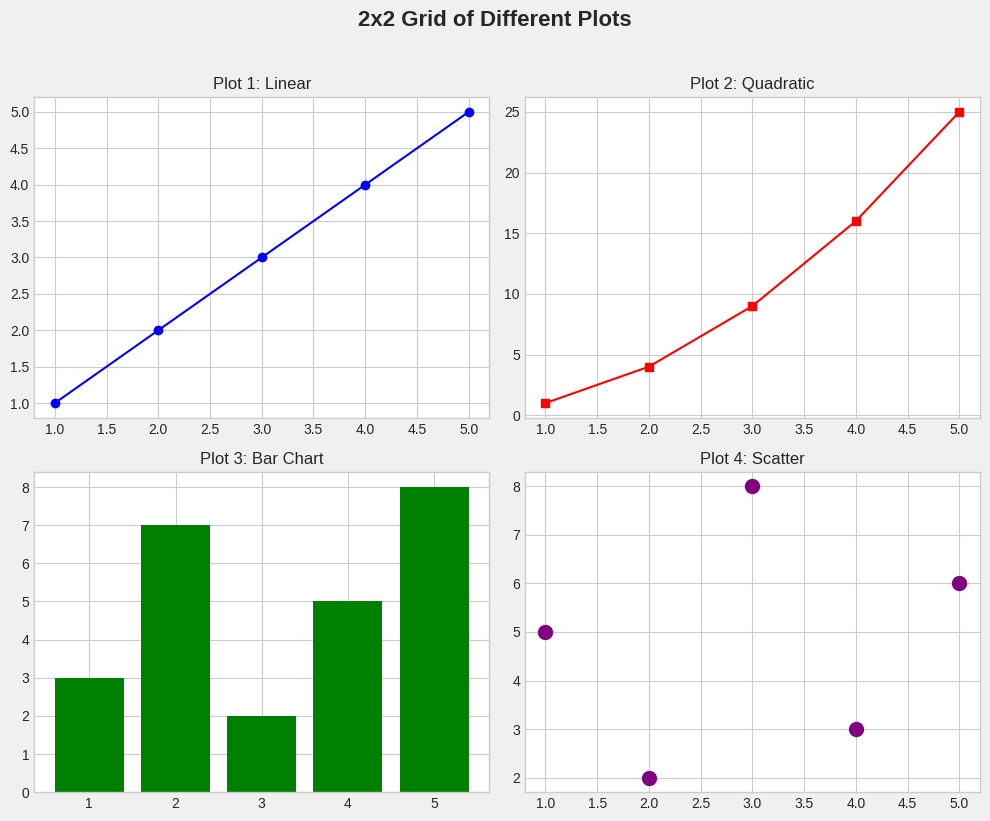

In [42]:
# 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# fig controls the canvas
# fig.set_size_inches(8, 4)              # Change figure size
fig.set_facecolor('#f0f0f0')           # Background color of the canvas

x = [1, 2, 3, 4, 5]

# Top-left: axes[0, 0]
axes[0, 0].plot(x, [1, 2, 3, 4, 5], 'b-o')
axes[0, 0].set_title("Plot 1: Linear")

# Top-right: axes[0, 1]
axes[0, 1].plot(x, [1, 4, 9, 16, 25], 'r-s')
axes[0, 1].set_title("Plot 2: Quadratic")

# Bottom-left: axes[1, 0]
axes[1, 0].bar(x, [3, 7, 2, 5, 8], color='green')
axes[1, 0].set_title("Plot 3: Bar Chart")

# Bottom-right: axes[1, 1]
axes[1, 1].scatter(x, [5, 2, 8, 3, 6], color='purple', s=100)
axes[1, 1].set_title("Plot 4: Scatter")

fig.suptitle("2x2 Grid of Different Plots", fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

### 📋 Quick Summary: Two Ways to Plot

| | Pyplot Interface | OOP Interface |
|---|------------------|---------------|
| **Syntax** | `plt.plot()` | `ax.plot()` |
| **Best for** | Quick, simple plots | Multiple plots, complex layouts |
| **Control** | Less | More |
| **Example** | `plt.title("Hi")` | `ax.set_title("Hi")` |

> **💡 Recommendation:** Start with pyplot for learning, switch to OOP for real projects.

---

## 📈 2.3 Line Plots in Detail

Now that you understand the basics, let's explore line plots more thoroughly with real-world data.

### Common Parameters

| Parameter | Description | Example Values |
|-----------|-------------|----------------|
| `color` | Line color | `'red'`, `'#3498db'`, `'C0'` |
| `linestyle` | Line style | `'-'`, `'--'`, `':'`, `'-.'` |
| `linewidth` | Line thickness | `1`, `2`, `3` |
| `marker` | Point marker | `'o'`, `'s'`, `'^'`, `'D'` |
| `alpha` | Transparency (0-1) | `0.5`, `0.8`, `1.0` |
| `label` | Legend label | `'Sales'`, `'Temperature'` |

### 🏢 Real-World Example: Stock Market Performance

/tmp/ipykernel_86003/3359534766.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


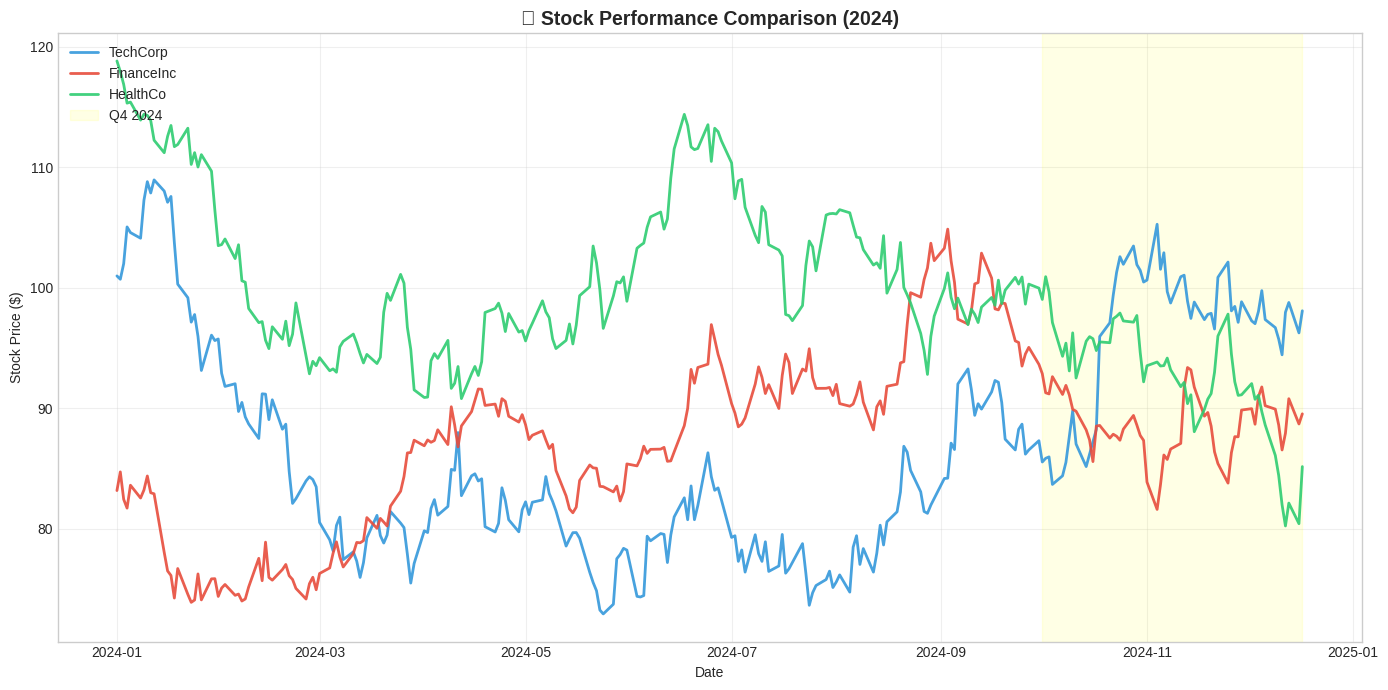

In [13]:
# Generate sample stock data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=252, freq='B')  # Business days

market_data = {
    'TechCorp': 100 + np.cumsum(np.random.randn(252) * 2),
    'FinanceInc': 80 + np.cumsum(np.random.randn(252) * 1.5),
    'HealthCo': 120 + np.cumsum(np.random.randn(252) * 1.8)
}

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#3498db', '#e74c3c', '#2ecc71']
for (company, prices), color in zip(market_data.items(), colors):
    ax.plot(dates, prices, linewidth=2, label=company, color=color, alpha=0.9)

# Add a shaded region to highlight Q4
q4_start = pd.Timestamp('2024-10-01')
ax.axvspan(q4_start, dates[-1], alpha=0.1, color='yellow', label='Q4 2024')

# Customize
ax.set_title('📈 Stock Performance Comparison (2024)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🎨 Line Styles & Markers Reference

Here's a quick reference for customizing your line plots:

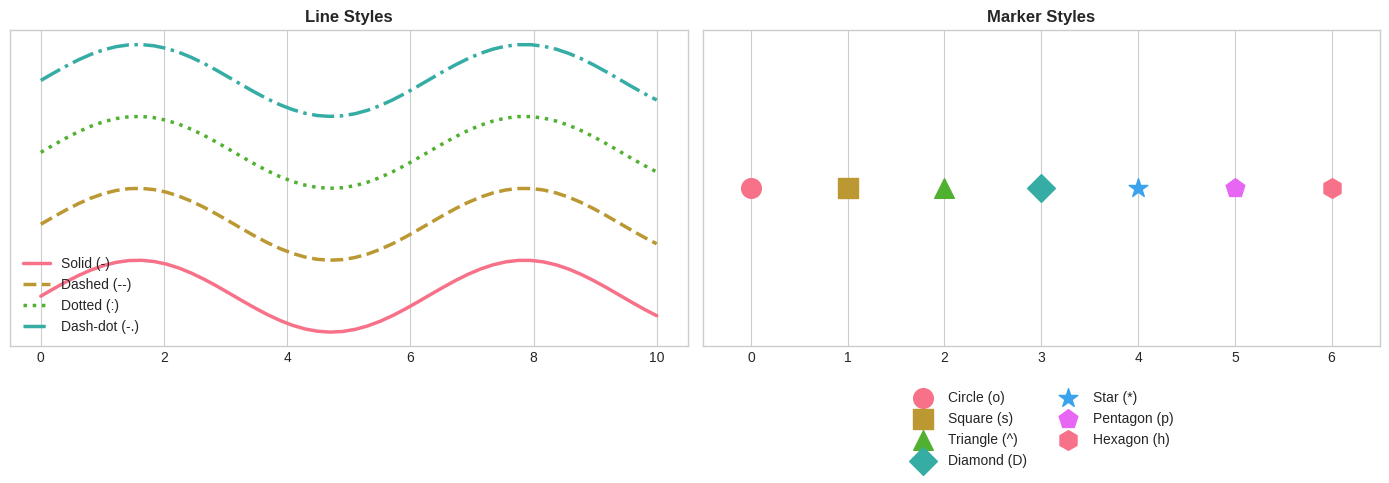

In [14]:
# Visual reference for line styles and markers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line styles
styles = ['-', '--', ':', '-.']
style_names = ['Solid', 'Dashed', 'Dotted', 'Dash-dot']
x = np.linspace(0, 10, 50)

for i, (style, name) in enumerate(zip(styles, style_names)):
    axes[0].plot(x, np.sin(x) + i*2, linestyle=style, linewidth=2.5, label=f"{name} ({style})")

axes[0].set_title('Line Styles', fontweight='bold')
axes[0].legend()
axes[0].set_yticks([])

# Markers
markers = ['o', 's', '^', 'D', '*', 'p', 'h']
marker_names = ['Circle', 'Square', 'Triangle', 'Diamond', 'Star', 'Pentagon', 'Hexagon']
x_points = np.arange(len(markers))

for i, (marker, name) in enumerate(zip(markers, marker_names)):
    axes[1].scatter([i], [1], marker=marker, s=200, label=f"{name} ({marker})")

axes[1].set_title('Marker Styles', fontweight='bold')
axes[1].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.1))
axes[1].set_xlim(-0.5, len(markers)-0.5)
axes[1].set_yticks([])

plt.tight_layout()
plt.show()

---

## 📊 2.2 Bar Charts

Bar charts are ideal for **comparing quantities across categories**.

### When to Use Each Type

| Type | Function | Best For |
|------|----------|----------|
| **Vertical bars** | `ax.bar(x, height)` | Few categories, short labels |
| **Horizontal bars** | `ax.barh(y, width)` | Many categories, long labels |
| **Grouped bars** | Multiple `bar()` calls with offset | Comparing series |
| **Stacked bars** | `bar()` with `bottom=` parameter | Part-to-whole within categories |

### Key Parameters

```python
ax.bar(x, height, 
       width=0.8,           # Bar width (default 0.8)
       color='blue',        # Fill color
       edgecolor='white',   # Border color
       alpha=0.8,           # Transparency
       label='Series')      # Legend label
```

### 🏢 Real-World Example: Quarterly Sales Report

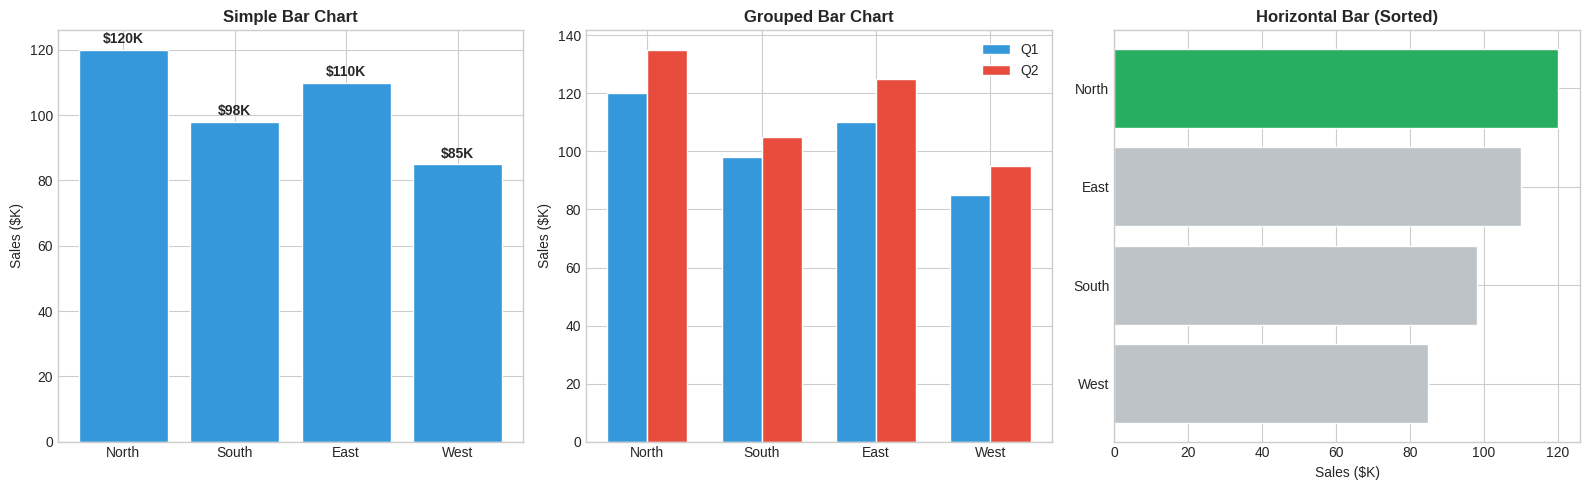

In [15]:
# Sales data
regions = ['North', 'South', 'East', 'West']
q1_sales = [120, 98, 110, 85]
q2_sales = [135, 105, 125, 95]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Simple vertical bar chart
axes[0].bar(regions, q1_sales, color='#3498db', edgecolor='white')
axes[0].set_title('Simple Bar Chart', fontweight='bold')
axes[0].set_ylabel('Sales ($K)')

# Add value labels on bars
for i, v in enumerate(q1_sales):
    axes[0].text(i, v + 2, f'${v}K', ha='center', fontweight='bold')

# 2. Grouped bar chart
x = np.arange(len(regions))
width = 0.35

axes[1].bar(x - width/2, q1_sales, width, label='Q1', color='#3498db', edgecolor='white')
axes[1].bar(x + width/2, q2_sales, width, label='Q2', color='#e74c3c', edgecolor='white')
axes[1].set_title('Grouped Bar Chart', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(regions)
axes[1].legend()
axes[1].set_ylabel('Sales ($K)')

# 3. Horizontal bar chart (sorted)
sorted_data = sorted(zip(regions, q1_sales), key=lambda x: x[1])
sorted_regions, sorted_sales = zip(*sorted_data)

colors = ['#bdc3c7'] * 3 + ['#27ae60']  # Highlight top performer
axes[2].barh(sorted_regions, sorted_sales, color=colors, edgecolor='white')
axes[2].set_title('Horizontal Bar (Sorted)', fontweight='bold')
axes[2].set_xlabel('Sales ($K)')

plt.tight_layout()
plt.show()

### 📚 Stacked Bar Charts

Stacked bars show **composition within each category**. Use the `bottom` parameter to stack bars:

/tmp/ipykernel_86003/3831216745.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


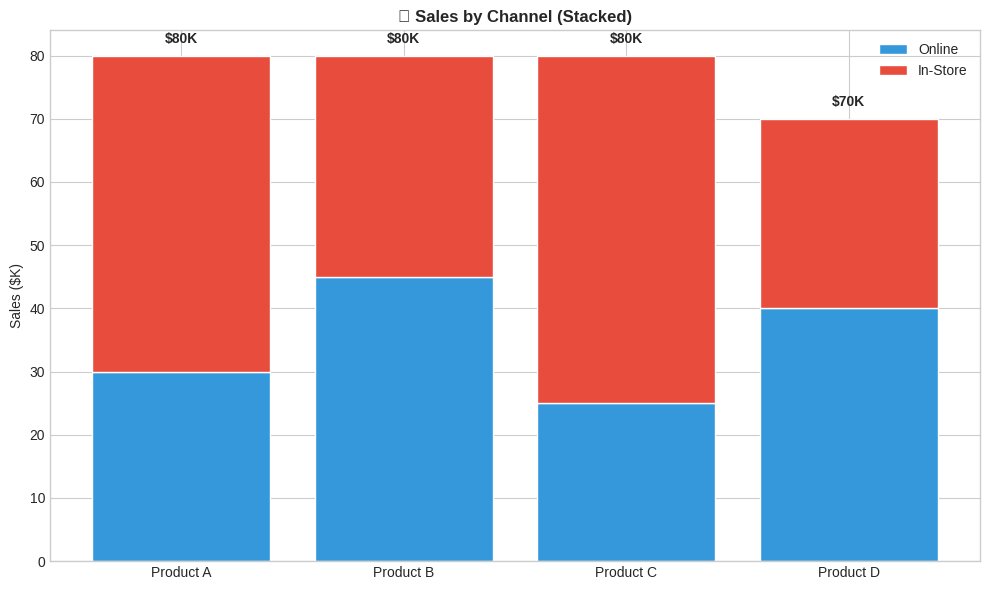

In [16]:
# Stacked bar chart example
categories = ['Product A', 'Product B', 'Product C', 'Product D']
online_sales = [30, 45, 25, 40]
store_sales = [50, 35, 55, 30]

fig, ax = plt.subplots(figsize=(10, 6))

# First bar (base)
ax.bar(categories, online_sales, label='Online', color='#3498db', edgecolor='white')

# Second bar (stacked on top using bottom parameter)
ax.bar(categories, store_sales, bottom=online_sales, label='In-Store', color='#e74c3c', edgecolor='white')

ax.set_title('📊 Sales by Channel (Stacked)', fontweight='bold')
ax.set_ylabel('Sales ($K)')
ax.legend()

# Add total labels
totals = [o + s for o, s in zip(online_sales, store_sales)]
for i, total in enumerate(totals):
    ax.text(i, total + 2, f'${total}K', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

---

## 🔵 2.3 Scatter Plots

Scatter plots reveal **relationships between two numerical variables**.

### Syntax

```python
ax.scatter(x, y,
           s=100,              # Marker size (can be array for bubble chart)
           c='blue',           # Color (can be array for color mapping)
           alpha=0.7,          # Transparency
           cmap='viridis',     # Colormap (when c is numeric)
           edgecolors='white') # Marker border
```

### 📊 What Scatter Plots Reveal

| Pattern | Interpretation |
|---------|----------------|
| Upward slope | **Positive correlation** - as X increases, Y increases |
| Downward slope | **Negative correlation** - as X increases, Y decreases |
| No pattern | **No correlation** - variables are independent |
| Clusters | **Groups** in your data |
| Outliers | **Anomalies** worth investigating |

### 🏠 Real-World Example: Housing Price Analysis

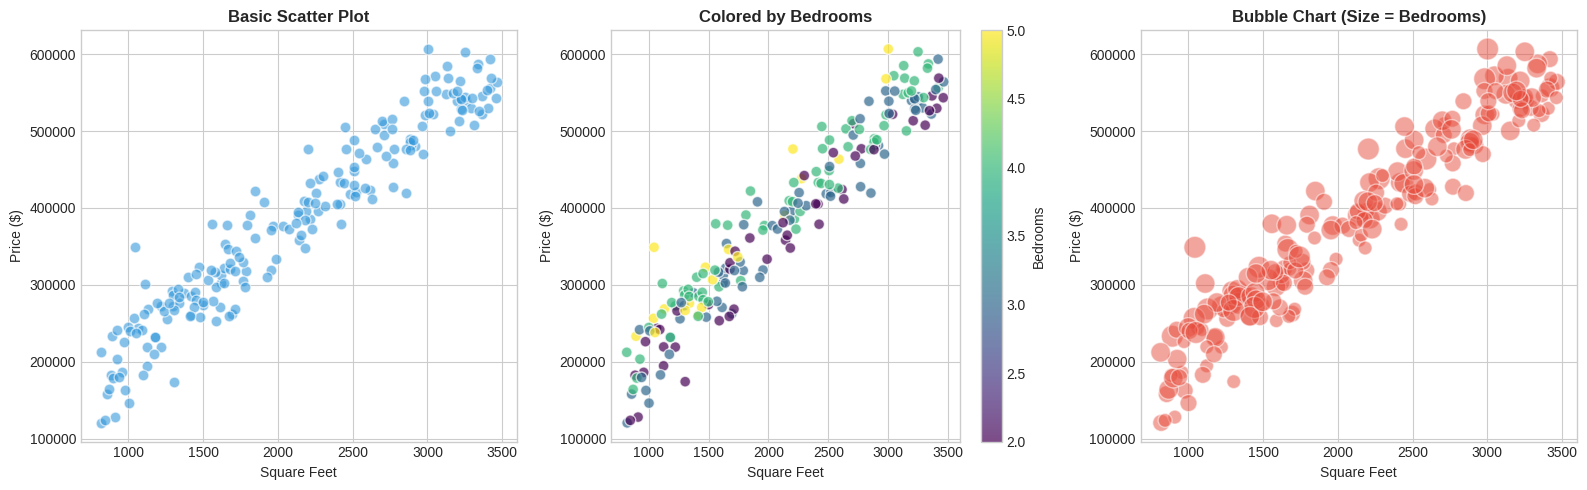

In [17]:
# Generate housing data
np.random.seed(42)
n_houses = 200

sqft = np.random.uniform(800, 3500, n_houses)
bedrooms = np.random.choice([2, 3, 4, 5], n_houses, p=[0.2, 0.4, 0.3, 0.1])
price = sqft * 150 + bedrooms * 20000 + np.random.normal(0, 30000, n_houses)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Basic scatter plot
axes[0].scatter(sqft, price, alpha=0.6, color='#3498db', edgecolors='white', s=60)
axes[0].set_title('Basic Scatter Plot', fontweight='bold')
axes[0].set_xlabel('Square Feet')
axes[0].set_ylabel('Price ($)')

# 2. Colored by category (bedrooms)
scatter = axes[1].scatter(sqft, price, c=bedrooms, cmap='viridis', 
                          alpha=0.7, edgecolors='white', s=60)
axes[1].set_title('Colored by Bedrooms', fontweight='bold')
axes[1].set_xlabel('Square Feet')
axes[1].set_ylabel('Price ($)')
plt.colorbar(scatter, ax=axes[1], label='Bedrooms')

# 3. Bubble chart (size = bedrooms)
axes[2].scatter(sqft, price, s=bedrooms*50, alpha=0.5, 
               color='#e74c3c', edgecolors='white')
axes[2].set_title('Bubble Chart (Size = Bedrooms)', fontweight='bold')
axes[2].set_xlabel('Square Feet')
axes[2].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

---

## 🥧 2.4 Pie Charts & Other Essential Charts

### Pie & Donut Charts

> ⚠️ **Use sparingly!** Pie charts are best with **≤7 categories**. For more categories, use bar charts.

```python
ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
```

| Parameter | Description |
|-----------|-------------|
| `sizes` | Values for each slice |
| `labels` | Category names |
| `autopct` | Format for percentage labels |
| `explode` | Tuple to "pull out" slices (e.g., `(0.1, 0, 0)`) |
| `wedgeprops` | Dict for styling (use `width=0.5` for donut) |

/tmp/ipykernel_86003/3951001780.py:21: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/3951001780.py:21: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


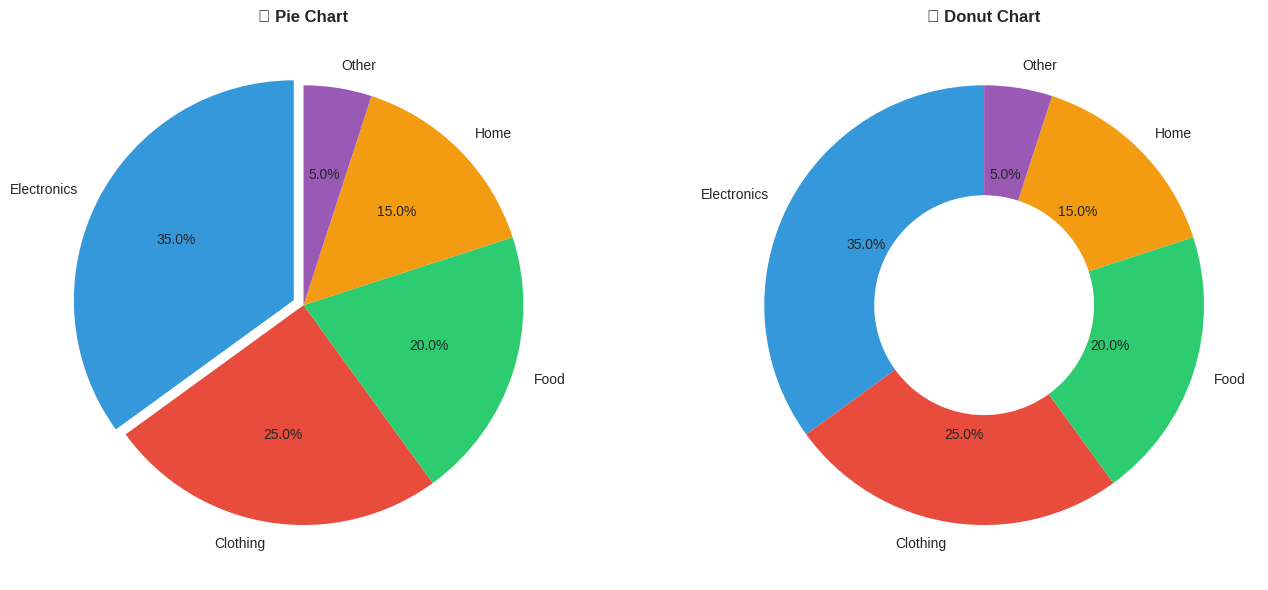

In [18]:
# Pie and Donut chart comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Data
categories = ['Electronics', 'Clothing', 'Food', 'Home', 'Other']
sales = [35, 25, 20, 15, 5]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
explode = (0.05, 0, 0, 0, 0)  # Emphasize first slice

# Pie chart
axes[0].pie(sales, labels=categories, autopct='%1.1f%%', 
            colors=colors, explode=explode, startangle=90)
axes[0].set_title('🥧 Pie Chart', fontweight='bold', fontsize=12)

# Donut chart (pie with hole)
wedges, texts, autotexts = axes[1].pie(sales, labels=categories, autopct='%1.1f%%',
                                        colors=colors, startangle=90,
                                        wedgeprops=dict(width=0.5))  # This creates the hole!
axes[1].set_title('🍩 Donut Chart', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

### 📊 Histograms

Histograms show the **distribution** of a single variable - how values are spread out.

```python
ax.hist(data, bins=30, color='blue', edgecolor='white', alpha=0.7)
```

| Parameter | Description |
|-----------|-------------|
| `bins` | Number of bars (or list of bin edges) |
| `density` | If True, normalize to show probability |
| `cumulative` | If True, show cumulative distribution |

/tmp/ipykernel_86003/2114022844.py:34: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


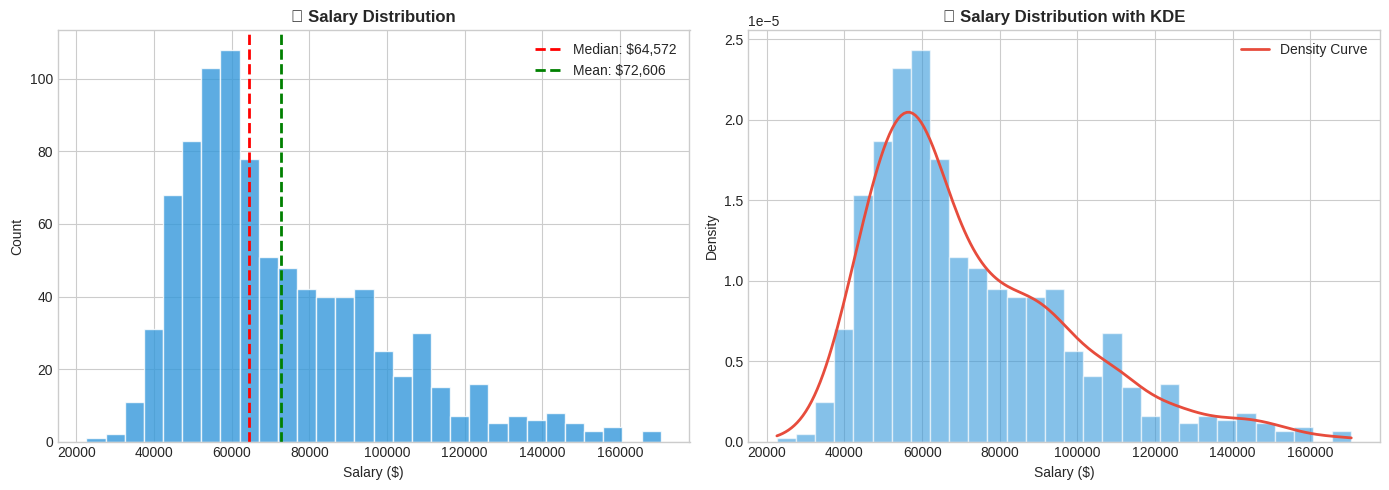

In [19]:
# Generate salary data
np.random.seed(42)
salaries = np.concatenate([
    np.random.normal(55000, 10000, 500),  # Entry-level
    np.random.normal(85000, 15000, 300),  # Mid-level
    np.random.normal(120000, 20000, 100)  # Senior
])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Basic histogram
axes[0].hist(salaries, bins=30, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].axvline(np.median(salaries), color='red', linestyle='--', linewidth=2, label=f'Median: ${np.median(salaries):,.0f}')
axes[0].axvline(np.mean(salaries), color='green', linestyle='--', linewidth=2, label=f'Mean: ${np.mean(salaries):,.0f}')
axes[0].set_title('💰 Salary Distribution', fontweight='bold')
axes[0].set_xlabel('Salary ($)')
axes[0].set_ylabel('Count')
axes[0].legend()

# Histogram with KDE (density curve)
axes[1].hist(salaries, bins=30, density=True, color='#3498db', edgecolor='white', alpha=0.6)

# Add KDE curve
from scipy.stats import gaussian_kde
kde = gaussian_kde(salaries)
x_range = np.linspace(salaries.min(), salaries.max(), 200)
axes[1].plot(x_range, kde(x_range), color='#e74c3c', linewidth=2, label='Density Curve')

axes[1].set_title('💰 Salary Distribution with KDE', fontweight='bold')
axes[1].set_xlabel('Salary ($)')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

### 📦 Box Plots & Violin Plots

These charts show **distribution summary** with emphasis on quartiles and outliers.

#### How to Read a Box Plot

```
    ┌─────┐ ← Maximum (or 1.5×IQR from Q3)
    │     │
    ├─────┤ ← Q3 (75th percentile)
    │  ●  │ ← Median (50th percentile)
    ├─────┤ ← Q1 (25th percentile)
    │     │
    └─────┘ ← Minimum (or 1.5×IQR from Q1)
    
    ○      ← Outliers (beyond whiskers)
```

**Violin plots** add a density curve to show the full distribution shape.

/tmp/ipykernel_86003/698212284.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot(salaries_by_dept, labels=departments, patch_artist=True)
/tmp/ipykernel_86003/698212284.py:36: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/698212284.py:36: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


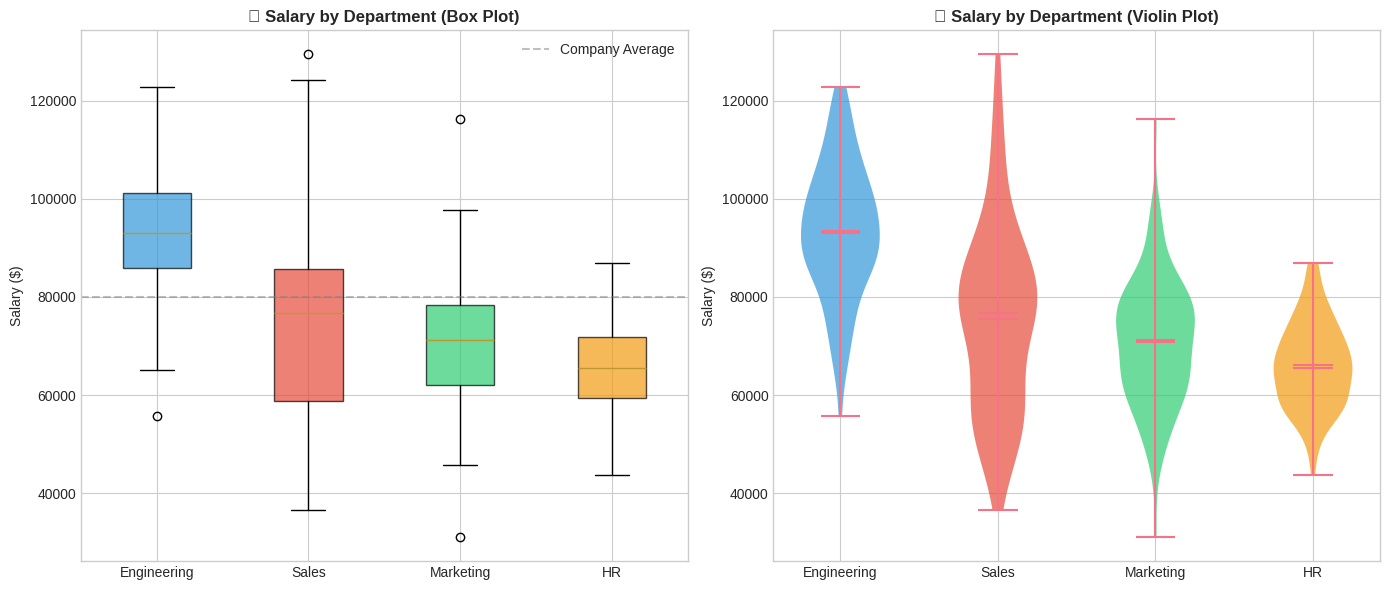

In [20]:
# Create department salary data
np.random.seed(42)
departments = ['Engineering', 'Sales', 'Marketing', 'HR']
salaries_by_dept = [
    np.random.normal(95000, 15000, 100),
    np.random.normal(75000, 20000, 100),
    np.random.normal(70000, 12000, 100),
    np.random.normal(65000, 10000, 100)
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
bp = axes[0].boxplot(salaries_by_dept, labels=departments, patch_artist=True)
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
axes[0].axhline(y=80000, color='gray', linestyle='--', alpha=0.5, label='Company Average')
axes[0].set_title('📦 Salary by Department (Box Plot)', fontweight='bold')
axes[0].set_ylabel('Salary ($)')
axes[0].legend()

# Violin plot
parts = axes[1].violinplot(salaries_by_dept, positions=range(1, 5), showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    
axes[1].set_xticks(range(1, 5))
axes[1].set_xticklabels(departments)
axes[1].set_title('🎻 Salary by Department (Violin Plot)', fontweight='bold')
axes[1].set_ylabel('Salary ($)')

plt.tight_layout()
plt.show()

## 2.5 Matplotlib Subplots and Layouts

/tmp/ipykernel_86003/2011050463.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) m

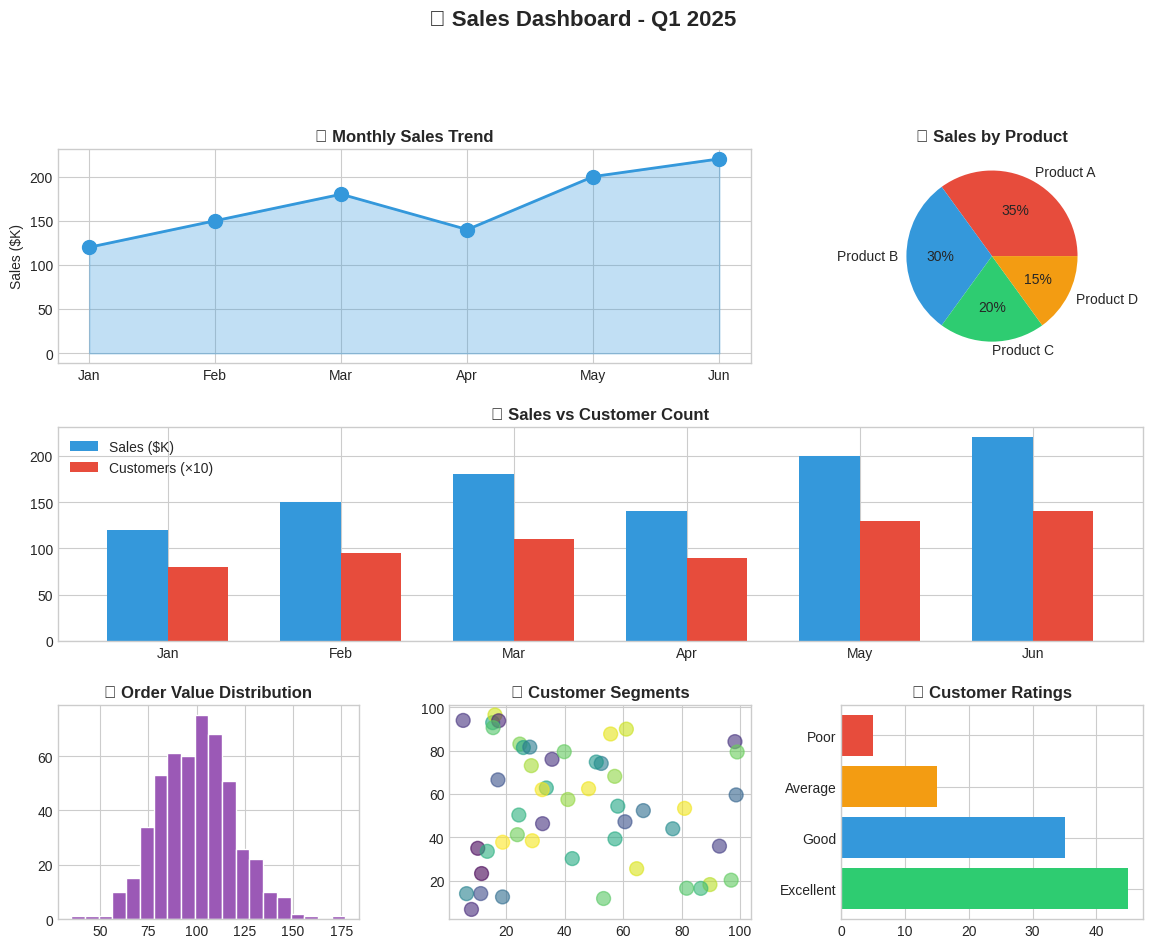

In [21]:
# Creating Complex Layouts with GridSpec
from matplotlib.gridspec import GridSpec

# Sample data for dashboard
np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales = [120, 150, 180, 140, 200, 220]
customers = [800, 950, 1100, 900, 1300, 1400]
categories = ['Product A', 'Product B', 'Product C', 'Product D']
cat_sales = [35, 30, 20, 15]

# Create figure with custom layout
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# Large plot spanning 2 columns
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(months, sales, marker='o', linewidth=2, markersize=10, color='#3498db')
ax1.fill_between(months, sales, alpha=0.3, color='#3498db')
ax1.set_title('📈 Monthly Sales Trend', fontweight='bold')
ax1.set_ylabel('Sales ($K)')

# Small pie chart
ax2 = fig.add_subplot(gs[0, 2])
ax2.pie(cat_sales, labels=categories, autopct='%1.0f%%', colors=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
ax2.set_title('🥧 Sales by Product', fontweight='bold')

# Bar chart spanning full width
ax3 = fig.add_subplot(gs[1, :])
x = np.arange(len(months))
width = 0.35
ax3.bar(x - width/2, sales, width, label='Sales ($K)', color='#3498db')
ax3.bar(x + width/2, [c/10 for c in customers], width, label='Customers (×10)', color='#e74c3c')
ax3.set_xticks(x)
ax3.set_xticklabels(months)
ax3.legend()
ax3.set_title('📊 Sales vs Customer Count', fontweight='bold')

# Three small plots at the bottom
ax4 = fig.add_subplot(gs[2, 0])
ax4.hist(np.random.normal(100, 20, 500), bins=20, color='#9b59b6', edgecolor='white')
ax4.set_title('📉 Order Value Distribution', fontweight='bold')

ax5 = fig.add_subplot(gs[2, 1])
ax5.scatter(np.random.rand(50)*100, np.random.rand(50)*100, c=np.random.rand(50), cmap='viridis', s=100, alpha=0.6)
ax5.set_title('🔵 Customer Segments', fontweight='bold')

ax6 = fig.add_subplot(gs[2, 2])
ax6.barh(['Excellent', 'Good', 'Average', 'Poor'], [45, 35, 15, 5], color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'])
ax6.set_title('⭐ Customer Ratings', fontweight='bold')

fig.suptitle('🎯 Sales Dashboard - Q1 2025', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 🎨 3.1 Why Use Seaborn?

**Seaborn** is built on top of Matplotlib with several advantages:

| Feature | Matplotlib | Seaborn |
|---------|------------|---------|
| Default styling | Basic | Beautiful defaults |
| Statistical plots | Manual | Built-in |
| DataFrame integration | Manual | Automatic |
| Multi-plot grids | Complex | Simple with FacetGrid |
| Code simplicity | More verbose | More concise |

### Seaborn Function Categories

| Category | Functions | Purpose |
|----------|-----------|---------|
| **Distribution** | `histplot()`, `kdeplot()`, `boxplot()`, `violinplot()` | How is data spread? |
| **Relationship** | `scatterplot()`, `regplot()`, `pairplot()` | How are variables related? |
| **Categorical** | `barplot()`, `countplot()`, `stripplot()` | Compare categories |
| **Matrix** | `heatmap()`, `clustermap()` | 2D patterns |

In [22]:
# Load Seaborn's built-in datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

print("📊 Available datasets loaded:")
print(f"   • tips: {tips.shape} - Restaurant tipping data")
print(f"   • iris: {iris.shape} - Flower measurements")
print(f"   • titanic: {titanic.shape} - Passenger survival data")
print("\n📋 Tips dataset preview:")
display(tips.head())

📊 Available datasets loaded:
   • tips: (244, 7) - Restaurant tipping data
   • iris: (150, 5) - Flower measurements
   • titanic: (891, 15) - Passenger survival data

📋 Tips dataset preview:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 📊 Distribution Plots

These show how a single variable is distributed:

| Function | Shows | Best For |
|----------|-------|----------|
| `sns.histplot()` | Histogram + optional KDE | General distribution |
| `sns.kdeplot()` | Smooth density curve | Comparing distributions |
| `sns.boxplot()` | Quartiles + outliers | Quick summary |
| `sns.violinplot()` | Density shape | Distribution shape comparison |

/tmp/ipykernel_86003/2900024317.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x='day', y='total_bill', palette='Set2', ax=axes[1, 0])
/tmp/ipykernel_86003/2900024317.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/2900024317.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/2900024317.py:20: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/2900024317.py:20: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N

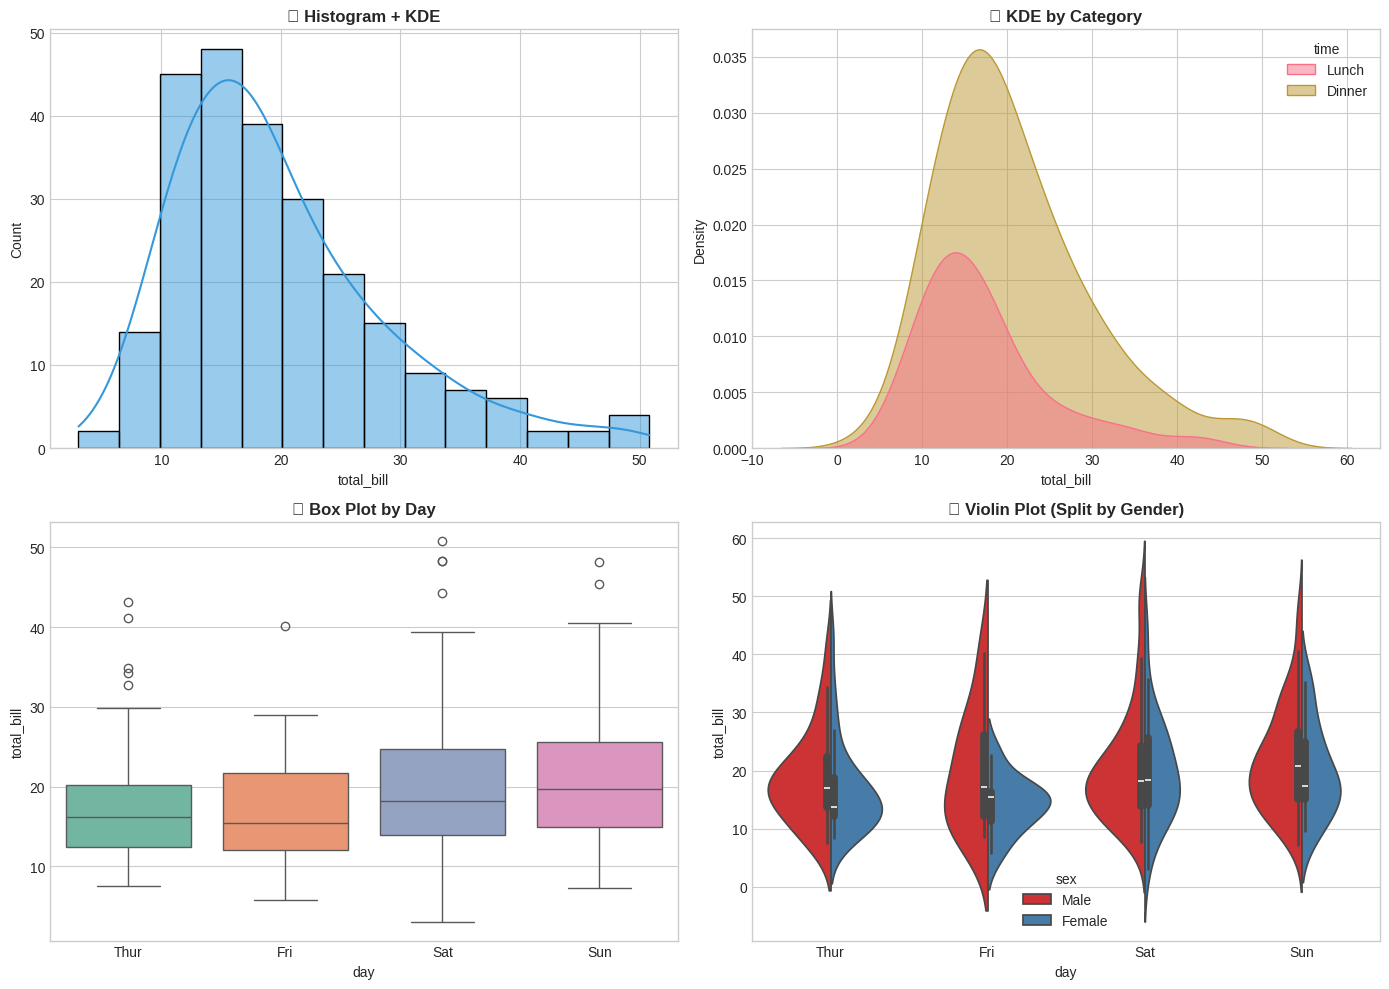

In [23]:
# Four ways to visualize distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram with KDE
sns.histplot(tips['total_bill'], kde=True, ax=axes[0, 0], color='#3498db')
axes[0, 0].set_title('📊 Histogram + KDE', fontweight='bold')

# 2. KDE comparison by category
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True, ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('📈 KDE by Category', fontweight='bold')

# 3. Box plot by category
sns.boxplot(data=tips, x='day', y='total_bill', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('📦 Box Plot by Day', fontweight='bold')

# 4. Violin plot by category
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('🎻 Violin Plot (Split by Gender)', fontweight='bold')

plt.tight_layout()
plt.show()

### 🔗 Relationship Plots

These show how two (or more) variables relate:

| Function | Shows | Best For |
|----------|-------|----------|
| `sns.scatterplot()` | Points | Basic relationship |
| `sns.regplot()` | Points + regression line | Linear relationships |
| `sns.pairplot()` | All variable pairs | Exploring many variables |

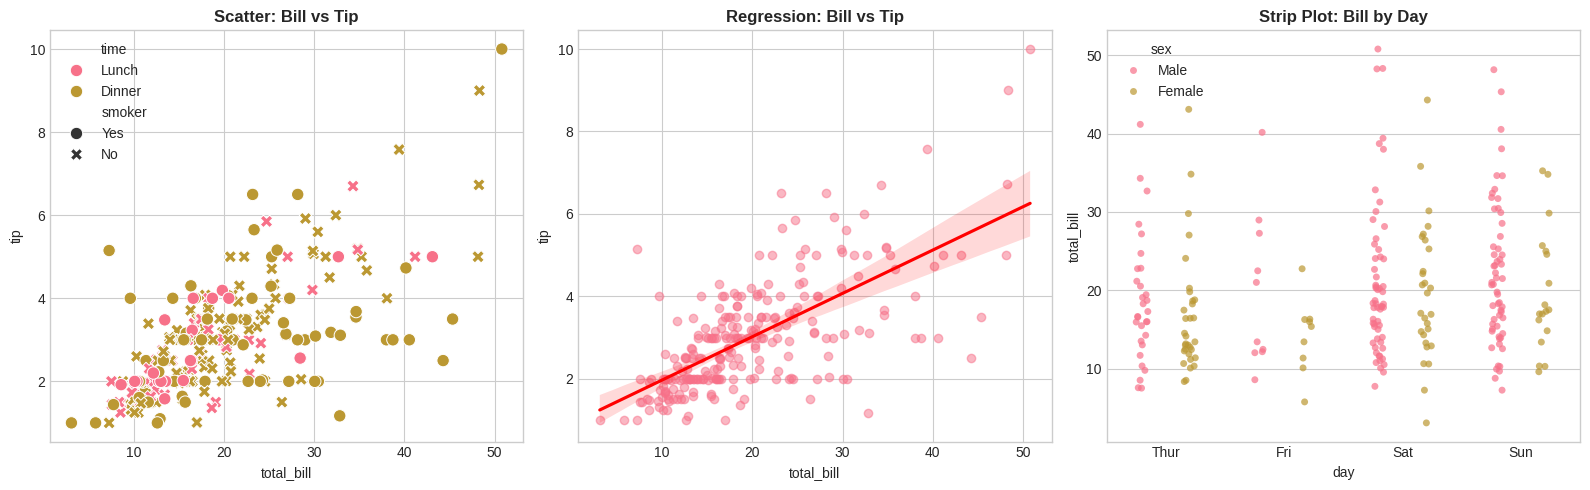

In [24]:
# Relationship plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Basic scatter with hue
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', 
                style='smoker', s=80, ax=axes[0])
axes[0].set_title('Scatter: Bill vs Tip', fontweight='bold')

# 2. Regression plot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[1],
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[1].set_title('Regression: Bill vs Tip', fontweight='bold')

# 3. Strip plot (categorical scatter)
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex', 
              dodge=True, ax=axes[2], alpha=0.7)
axes[2].set_title('Strip Plot: Bill by Day', fontweight='bold')

plt.tight_layout()
plt.show()

### 🌸 Pair Plots

`sns.pairplot()` creates a matrix showing relationships between ALL numeric variables at once - perfect for exploratory analysis:

/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


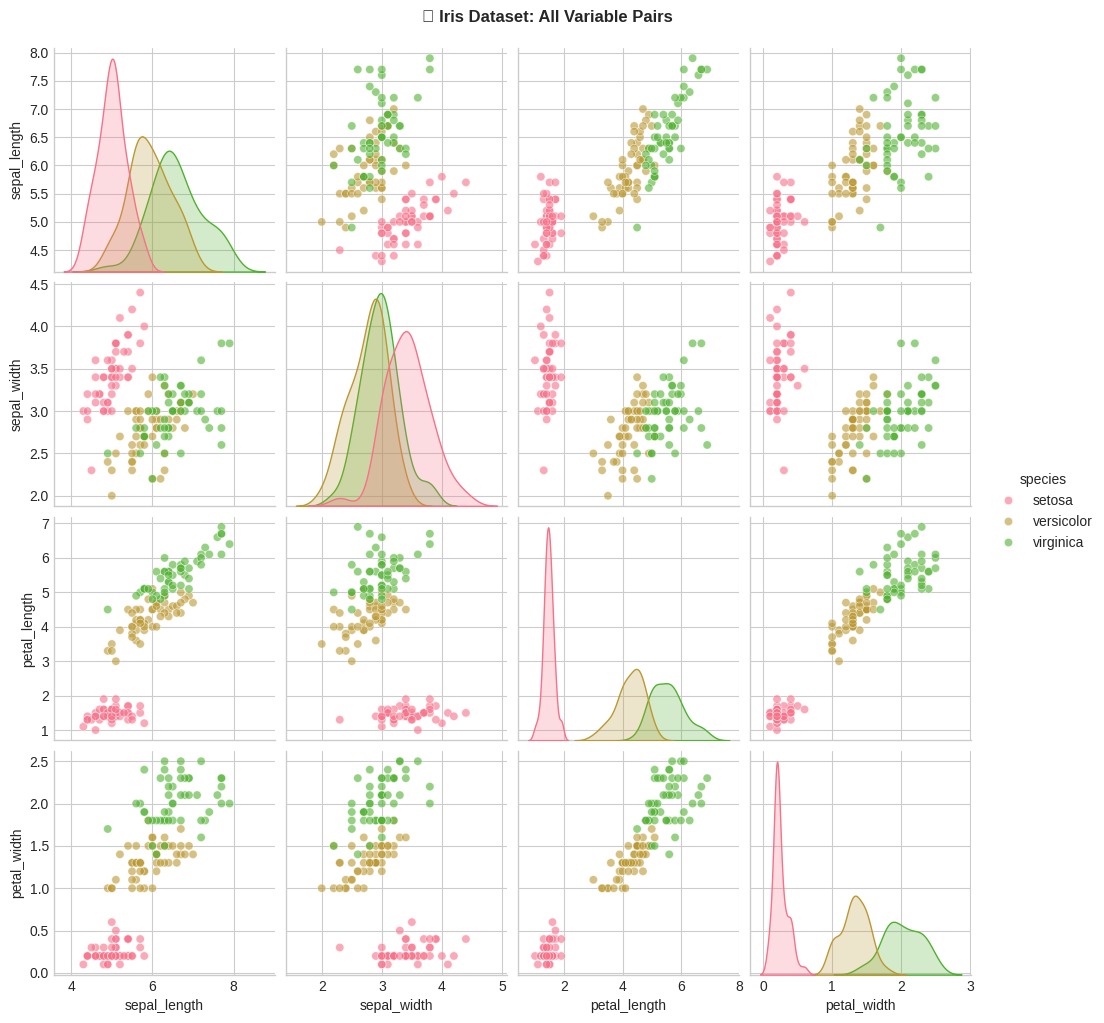

In [25]:
# Pair plot - see all relationships at once!
g = sns.pairplot(iris, hue='species', height=2.5, 
                 diag_kind='kde',  # KDE on diagonal
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('🌸 Iris Dataset: All Variable Pairs', y=1.02, fontweight='bold')
plt.show()

### 🔥 Heatmaps

Heatmaps visualize **matrix data** where colors represent values. Common uses:
- **Correlation matrices** - see which variables are related
- **Pivot tables** - values across two categories
- **Confusion matrices** - ML model evaluation

```python
sns.heatmap(data, 
            annot=True,      # Show values in cells
            fmt='.2f',       # Number format
            cmap='coolwarm', # Color scheme
            center=0)        # Value at color center
```

/tmp/ipykernel_86003/3104655660.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tips.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/tmp/ipykernel_86003/3104655660.py:21: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph

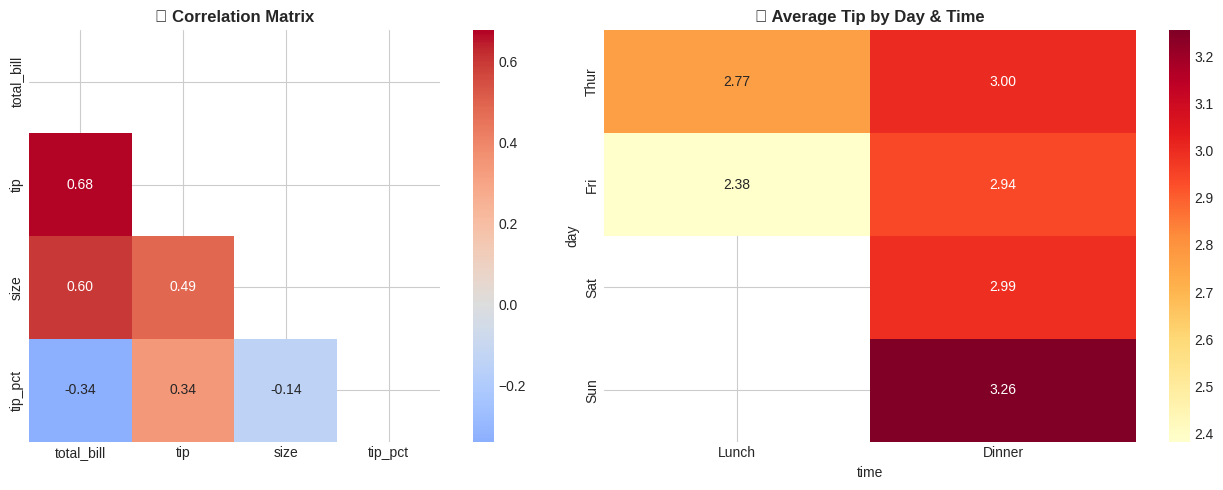

In [26]:
# Create correlation matrix heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Correlation heatmap
tips_numeric = tips[['total_bill', 'tip', 'size']].copy()
tips_numeric['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
correlation = tips_numeric.corr()

# Mask upper triangle (since correlation matrix is symmetric)
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, mask=mask, ax=axes[0], square=True)
axes[0].set_title('🔗 Correlation Matrix', fontweight='bold')

# 2. Pivot table heatmap
pivot = tips.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('💰 Average Tip by Day & Time', fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 Advanced: Clustered Heatmaps

`sns.clustermap()` adds **hierarchical clustering** - it automatically groups similar rows and columns together, revealing patterns in your data.

/tmp/ipykernel_86003/555395386.py:14: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


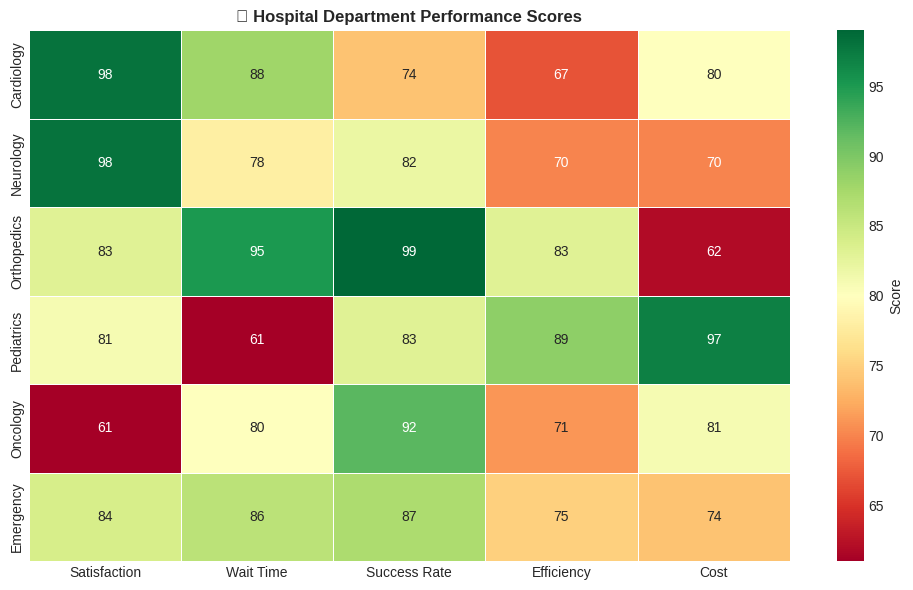

In [27]:
# Create sample performance data
np.random.seed(42)
departments = ['Cardiology', 'Neurology', 'Orthopedics', 'Pediatrics', 'Oncology', 'Emergency']
metrics = ['Satisfaction', 'Wait Time', 'Success Rate', 'Efficiency', 'Cost']

performance_data = np.random.randint(60, 100, size=(len(departments), len(metrics)))
performance_df = pd.DataFrame(performance_data, index=departments, columns=metrics)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(performance_df, annot=True, fmt='d', cmap='RdYlGn', 
            linewidths=0.5, cbar_kws={'label': 'Score'})
ax.set_title('🏥 Hospital Department Performance Scores', fontweight='bold')
plt.tight_layout()
plt.show()

/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


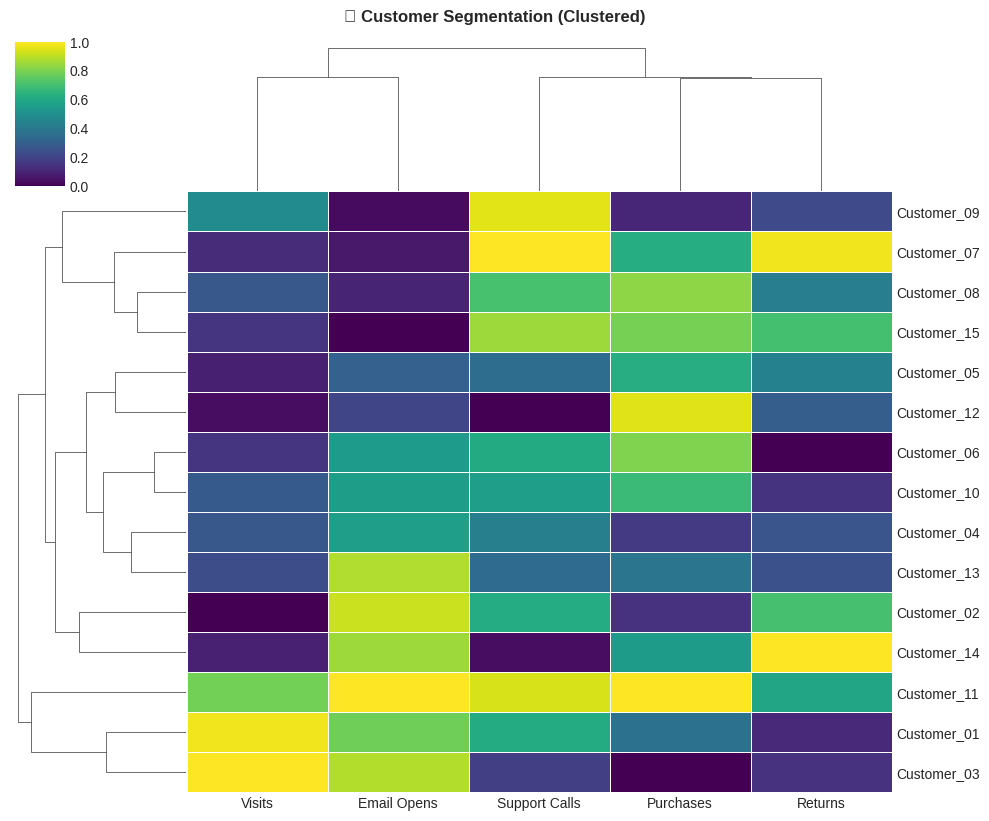

💡 Notice how similar customers are grouped together in the dendrogram!


In [28]:
# Clustered heatmap - groups similar items together
np.random.seed(42)
customer_ids = [f'Customer_{i:02d}' for i in range(1, 16)]
behaviors = ['Purchases', 'Visits', 'Email Opens', 'Support Calls', 'Returns']

behavior_data = np.random.rand(15, 5) * 100
behavior_df = pd.DataFrame(behavior_data, index=customer_ids, columns=behaviors)

g = sns.clustermap(behavior_df, cmap='viridis', figsize=(10, 8),
                   standard_scale=1, linewidths=0.5)
g.fig.suptitle('👥 Customer Segmentation (Clustered)', fontweight='bold', y=1.02)
plt.show()

print("💡 Notice how similar customers are grouped together in the dendrogram!")

---

## 🔲 3.2 FacetGrid - Multi-Plot Layouts

`FacetGrid` creates a **grid of plots** split by categorical variables - perfect for comparing the same relationship across different groups.

### Syntax

```python
# Create grid structure
g = sns.FacetGrid(data, col='category1', row='category2', height=4)

# Apply plot to each cell
g.map_dataframe(sns.scatterplot, x='x_col', y='y_col', hue='color_col')

# Add shared legend
g.add_legend()
```

### When to Use
- Comparing same visualization across categories
- Avoiding overcrowded single plots
- Showing patterns within subgroups

/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


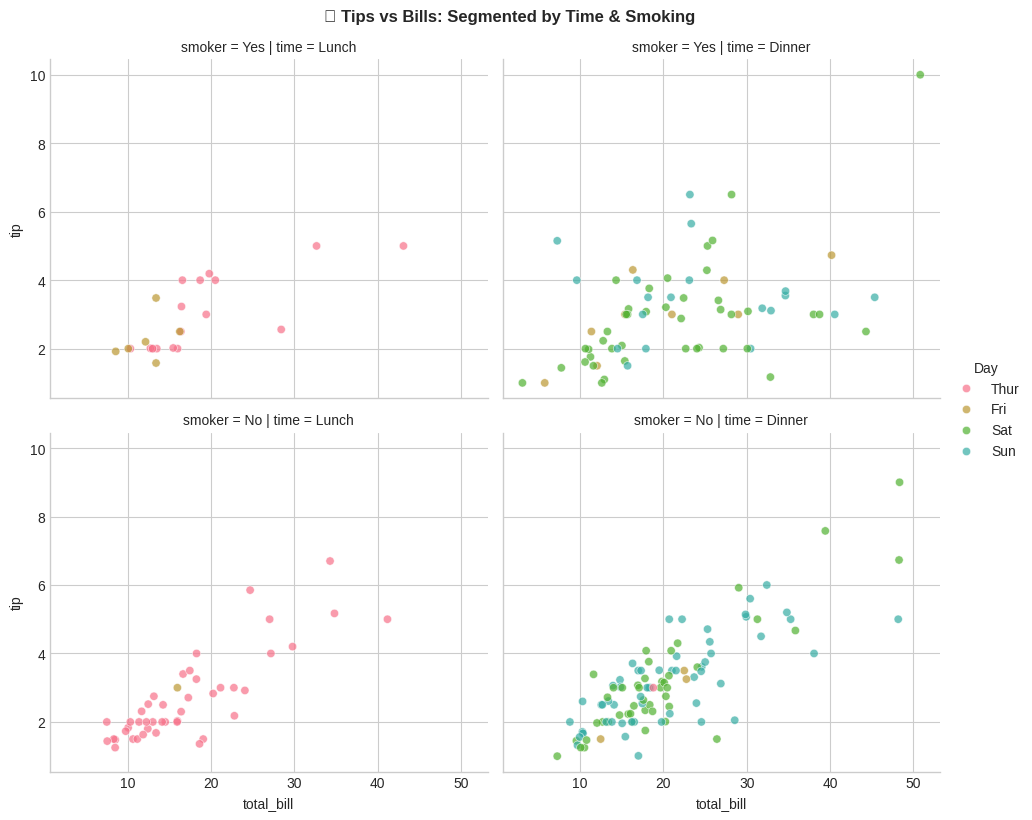

In [29]:
# FacetGrid: scatter plots split by time and smoker status
g = sns.FacetGrid(tips, col='time', row='smoker', height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', hue='day', alpha=0.7)
g.add_legend(title='Day')
g.fig.suptitle('💰 Tips vs Bills: Segmented by Time & Smoking', y=1.02, fontweight='bold')
plt.show()

/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


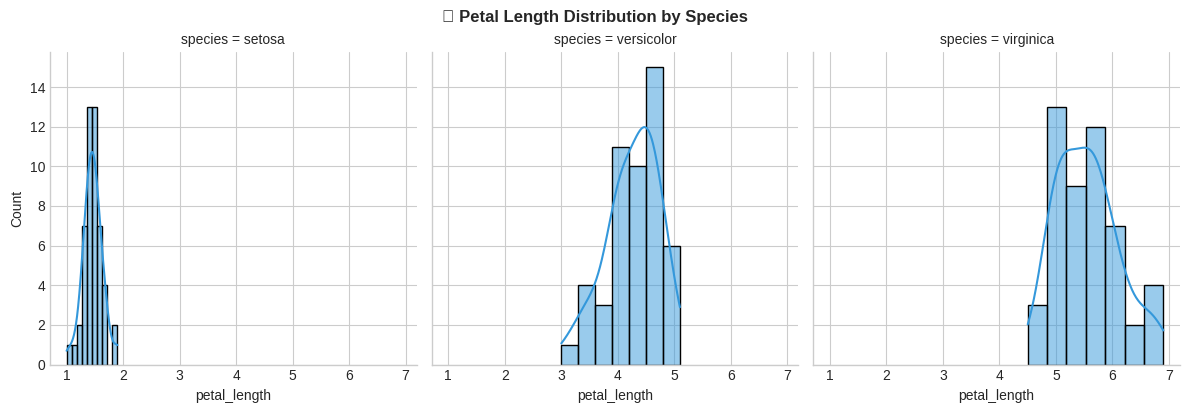

In [30]:
# FacetGrid: histograms by species
g = sns.FacetGrid(iris, col='species', height=4)
g.map(sns.histplot, 'petal_length', kde=True, color='#3498db')
g.fig.suptitle('🌸 Petal Length Distribution by Species', y=1.02, fontweight='bold')
plt.show()

---

# 4. Choosing the Right Chart

Selecting the appropriate visualization is crucial for effective communication. 

## 🎯 The Golden Rule

> **Ask yourself: "What question am I trying to answer?"**

## Chart Selection Decision Tree

```
What do you want to show?
│
├── 📊 COMPARISON (comparing values across categories)
│   ├── Few categories → Vertical Bar Chart
│   ├── Many categories → Horizontal Bar Chart
│   ├── Over time → Line Chart
│   └── Multiple series → Grouped Bar Chart
│
├── 📈 DISTRIBUTION (how data is spread)
│   ├── Single variable → Histogram
│   ├── Show shape → KDE Plot
│   ├── Compare groups → Multiple Histograms or Violin Plot
│   └── Summary + outliers → Box Plot
│
├── 🔗 RELATIONSHIP (correlation between variables)
│   ├── Two variables → Scatter Plot
│   ├── With regression → sns.regplot()
│   ├── Many variables → Pair Plot or Heatmap
│   └── Show density → Bubble Chart
│
├── 🥧 COMPOSITION (parts of a whole)
│   ├── ≤7 categories → Pie or Donut Chart
│   ├── Many categories → Stacked Bar Chart
│   └── Over time → Stacked Area Chart
│
└── ⏰ TREND (change over time)
    ├── Single series → Line Chart
    ├── Multiple series → Multi-line Chart
    └── With uncertainty → Line + Confidence Band
```

## Quick Reference Table

| Question | Chart Type | Seaborn Function |
|----------|------------|------------------|
| How is this distributed? | Histogram | `sns.histplot()` |
| How do groups compare? | Bar Chart | `sns.barplot()` |
| Is there a relationship? | Scatter Plot | `sns.scatterplot()` |
| What's the trend? | Line Chart | `sns.lineplot()` |
| What are the outliers? | Box Plot | `sns.boxplot()` |

/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1117394245.py:45: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  plt.tight_la

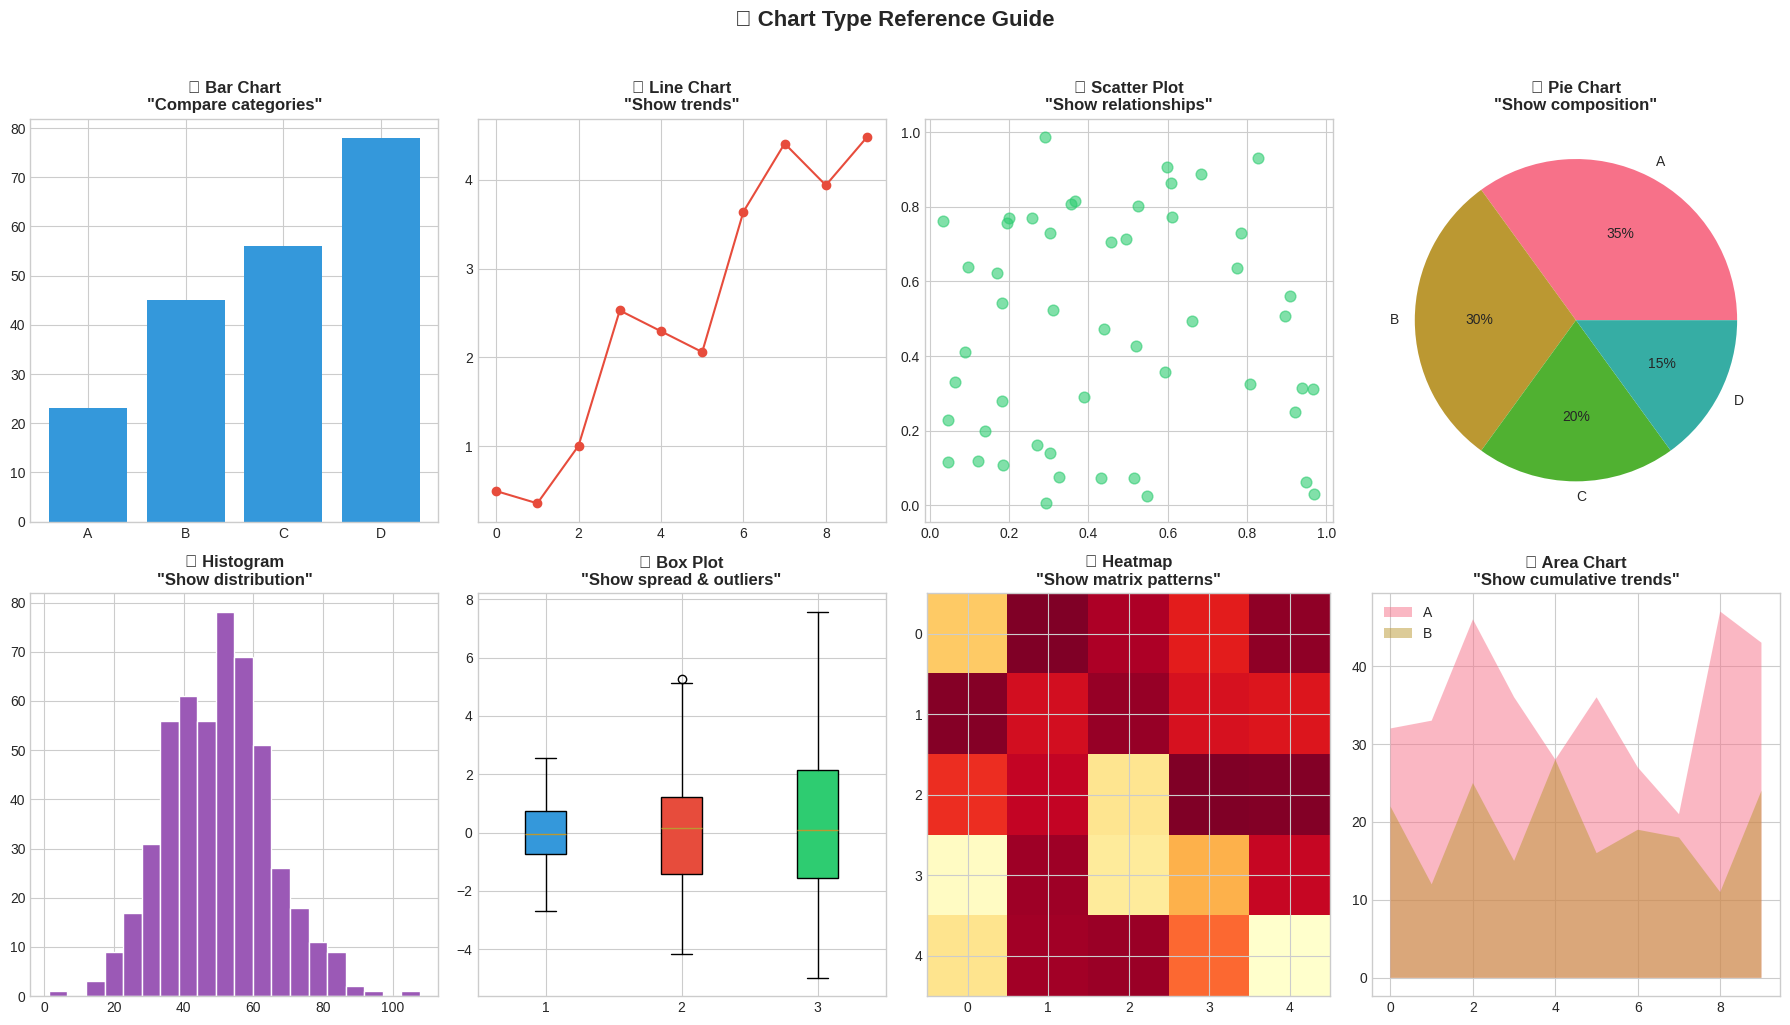

In [31]:
# Visual chart type reference
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('📊 Chart Type Reference Guide', fontsize=16, fontweight='bold', y=1.02)

np.random.seed(42)

# 1. Bar Chart
axes[0, 0].bar(['A', 'B', 'C', 'D'], [23, 45, 56, 78], color='#3498db')
axes[0, 0].set_title('📊 Bar Chart\n"Compare categories"', fontweight='bold')

# 2. Line Chart
axes[0, 1].plot(range(10), np.cumsum(np.random.randn(10)), 'o-', color='#e74c3c')
axes[0, 1].set_title('📈 Line Chart\n"Show trends"', fontweight='bold')

# 3. Scatter Plot
x, y = np.random.rand(50), np.random.rand(50)
axes[0, 2].scatter(x, y, alpha=0.6, color='#2ecc71', s=60)
axes[0, 2].set_title('🔵 Scatter Plot\n"Show relationships"', fontweight='bold')

# 4. Pie Chart
axes[0, 3].pie([35, 30, 20, 15], labels=['A', 'B', 'C', 'D'], autopct='%1.0f%%')
axes[0, 3].set_title('🥧 Pie Chart\n"Show composition"', fontweight='bold')

# 5. Histogram
axes[1, 0].hist(np.random.normal(50, 15, 500), bins=20, color='#9b59b6', edgecolor='white')
axes[1, 0].set_title('📉 Histogram\n"Show distribution"', fontweight='bold')

# 6. Box Plot
bp = axes[1, 1].boxplot([np.random.normal(0, i, 100) for i in range(1, 4)], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#3498db', '#e74c3c', '#2ecc71']):
    patch.set_facecolor(color)
axes[1, 1].set_title('📦 Box Plot\n"Show spread & outliers"', fontweight='bold')

# 7. Heatmap
axes[1, 2].imshow(np.random.rand(5, 5), cmap='YlOrRd')
axes[1, 2].set_title('🔥 Heatmap\n"Show matrix patterns"', fontweight='bold')

# 8. Area Chart
x = np.arange(10)
axes[1, 3].fill_between(x, np.random.randint(20, 50, 10), alpha=0.5, label='A')
axes[1, 3].fill_between(x, np.random.randint(10, 30, 10), alpha=0.5, label='B')
axes[1, 3].legend()
axes[1, 3].set_title('📊 Area Chart\n"Show cumulative trends"', fontweight='bold')

plt.tight_layout()
plt.show()

## Common Visualization Mistakes to Avoid

Learning what **NOT** to do is just as important as learning best practices!

### ⚠️ Red Flags in Data Visualization

| ❌ Mistake | ✅ Better Practice | Why It Matters |
|-----------|--------------------|----------------|
| Using 3D charts for 2D data | Stick to 2D visualizations | 3D distorts perception of values |
| Pie charts with many categories | Use bar charts for >7 categories | Hard to compare similar slices |
| Truncating y-axis in bar charts | Start y-axis at 0 | Truncation exaggerates differences |
| Rainbow color scales for sequential data | Use sequential color palettes | Rainbow implies categories, not order |
| Too many elements on one chart | Simplify or use multiple charts | Cognitive overload reduces understanding |
| Missing axis labels/titles | Always include clear labels | Readers can't interpret unlabeled charts |
| Using only color to encode data | Add patterns, labels, or annotations | Not accessible for colorblind viewers |

/tmp/ipykernel_86003/3582845414.py:32: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/3582845414.py:32: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


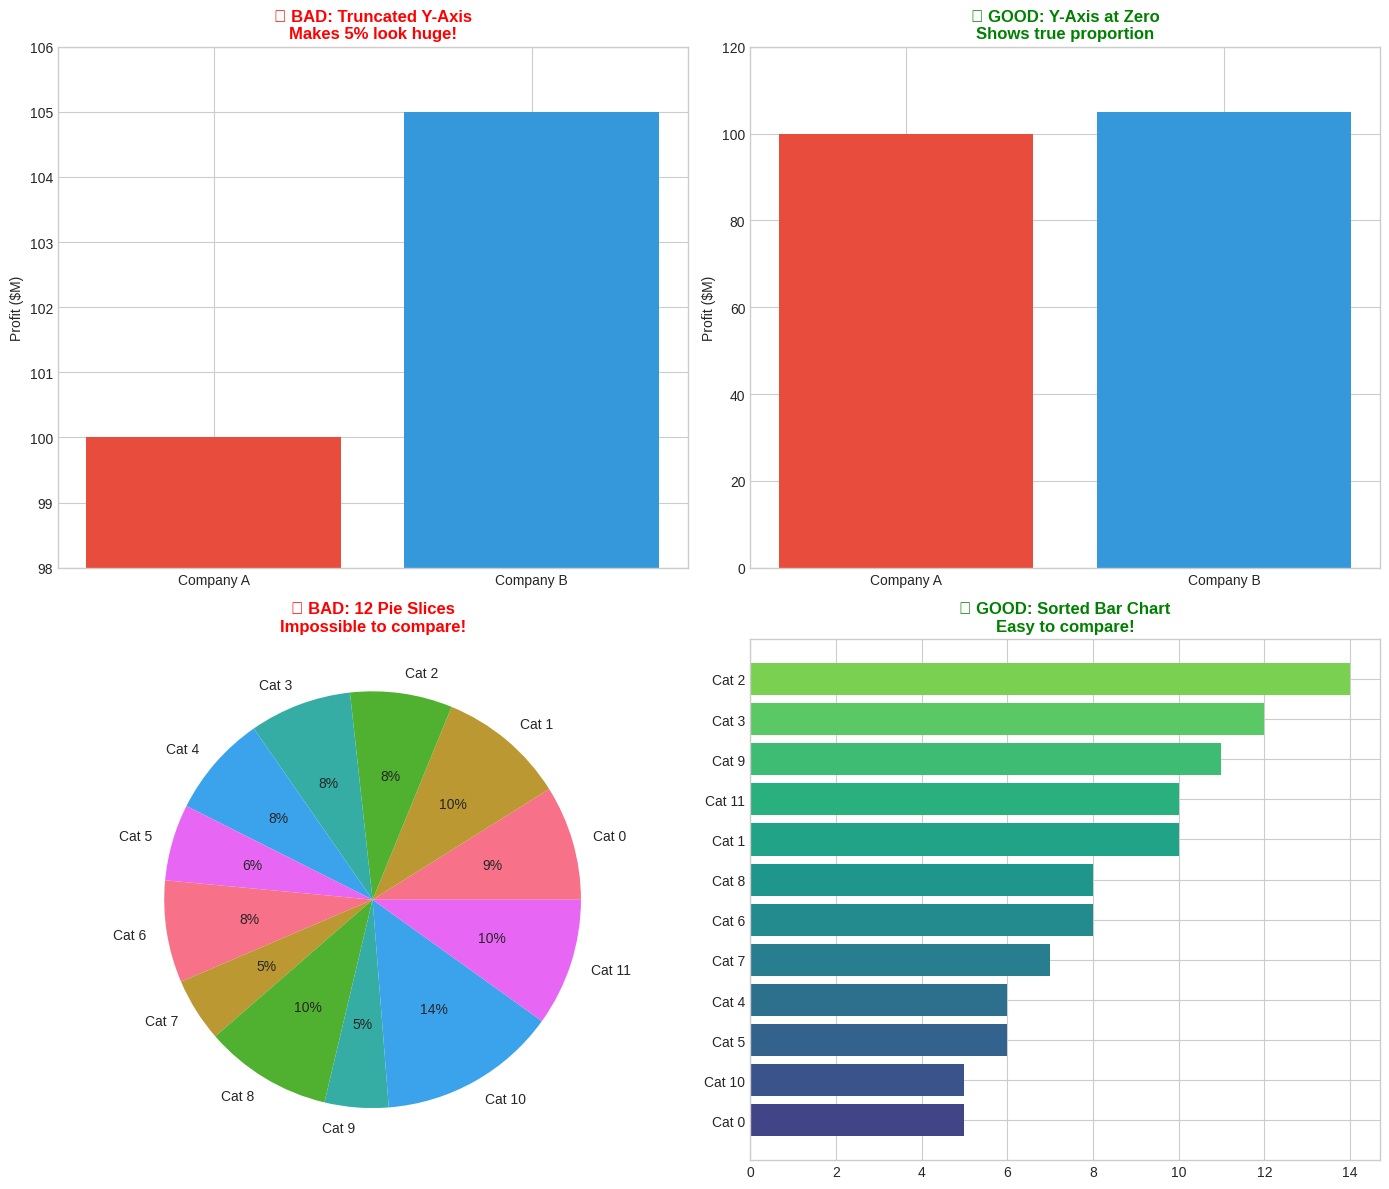

In [32]:
# Good vs Bad visualization practices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Data: Similar profits
profits = [100, 105]
companies = ['Company A', 'Company B']

# BAD: Truncated Y-axis (misleading!)
axes[0, 0].bar(companies, profits, color=['#e74c3c', '#3498db'])
axes[0, 0].set_ylim(98, 106)  # Truncated!
axes[0, 0].set_title('❌ BAD: Truncated Y-Axis\nMakes 5% look huge!', color='red', fontweight='bold')
axes[0, 0].set_ylabel('Profit ($M)')

# GOOD: Y-axis starts at 0
axes[0, 1].bar(companies, profits, color=['#e74c3c', '#3498db'])
axes[0, 1].set_ylim(0, 120)
axes[0, 1].set_title('✅ GOOD: Y-Axis at Zero\nShows true proportion', color='green', fontweight='bold')
axes[0, 1].set_ylabel('Profit ($M)')

# BAD: Too many pie slices
axes[1, 0].pie(np.random.randint(5, 15, 12), labels=[f'Cat {i}' for i in range(12)], autopct='%1.0f%%')
axes[1, 0].set_title('❌ BAD: 12 Pie Slices\nImpossible to compare!', color='red', fontweight='bold')

# GOOD: Horizontal bar chart (sorted)
values = np.random.randint(5, 15, 12)
labels = [f'Cat {i}' for i in range(12)]
sorted_idx = np.argsort(values)
axes[1, 1].barh([labels[i] for i in sorted_idx], [values[i] for i in sorted_idx],
                color=plt.cm.viridis(np.linspace(0.2, 0.8, 12)))
axes[1, 1].set_title('✅ GOOD: Sorted Bar Chart\nEasy to compare!', color='green', fontweight='bold')

plt.tight_layout()
plt.show()

---

# 5. Storytelling with Data

Effective data visualization isn't just about creating charts—it's about **telling a compelling story that drives action**.

## The Data Storytelling Framework

Every good data story has three parts:

```
┌─────────────────────────────────────────────────────────┐
│  1. CONTEXT → Set the scene                             │
│     "What's the current situation?"                     │
│     Example: "Sales have been tracked for 5 quarters"   │
├─────────────────────────────────────────────────────────┤
│  2. CONFLICT → Identify the problem/opportunity         │
│     "What needs to change?"                             │
│     Example: "We're losing market share to competitors" │
├─────────────────────────────────────────────────────────┤
│  3. RESOLUTION → Present the insight + action           │
│     "What should we do about it?"                       │
│     Example: "Increase marketing spend on Product A"    │
└─────────────────────────────────────────────────────────┘
```

## 🎯 Key Principles of Data Storytelling

| Principle | What It Means | How To Do It |
|-----------|---------------|--------------|
| **Lead with insight** | Don't make readers search for it | Put the main finding in the title |
| **Use strategic emphasis** | Draw attention to what matters | Use color, size, or annotations |
| **Remove clutter** | Every element should earn its place | Delete gridlines, borders, legends if not needed |
| **Tell one story per chart** | Don't overwhelm | Split complex insights into multiple visuals |
| **Design for your audience** | Executives ≠ Analysts | Simplify for decision-makers |

/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipykernel_86003/1443600661.py:63: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()

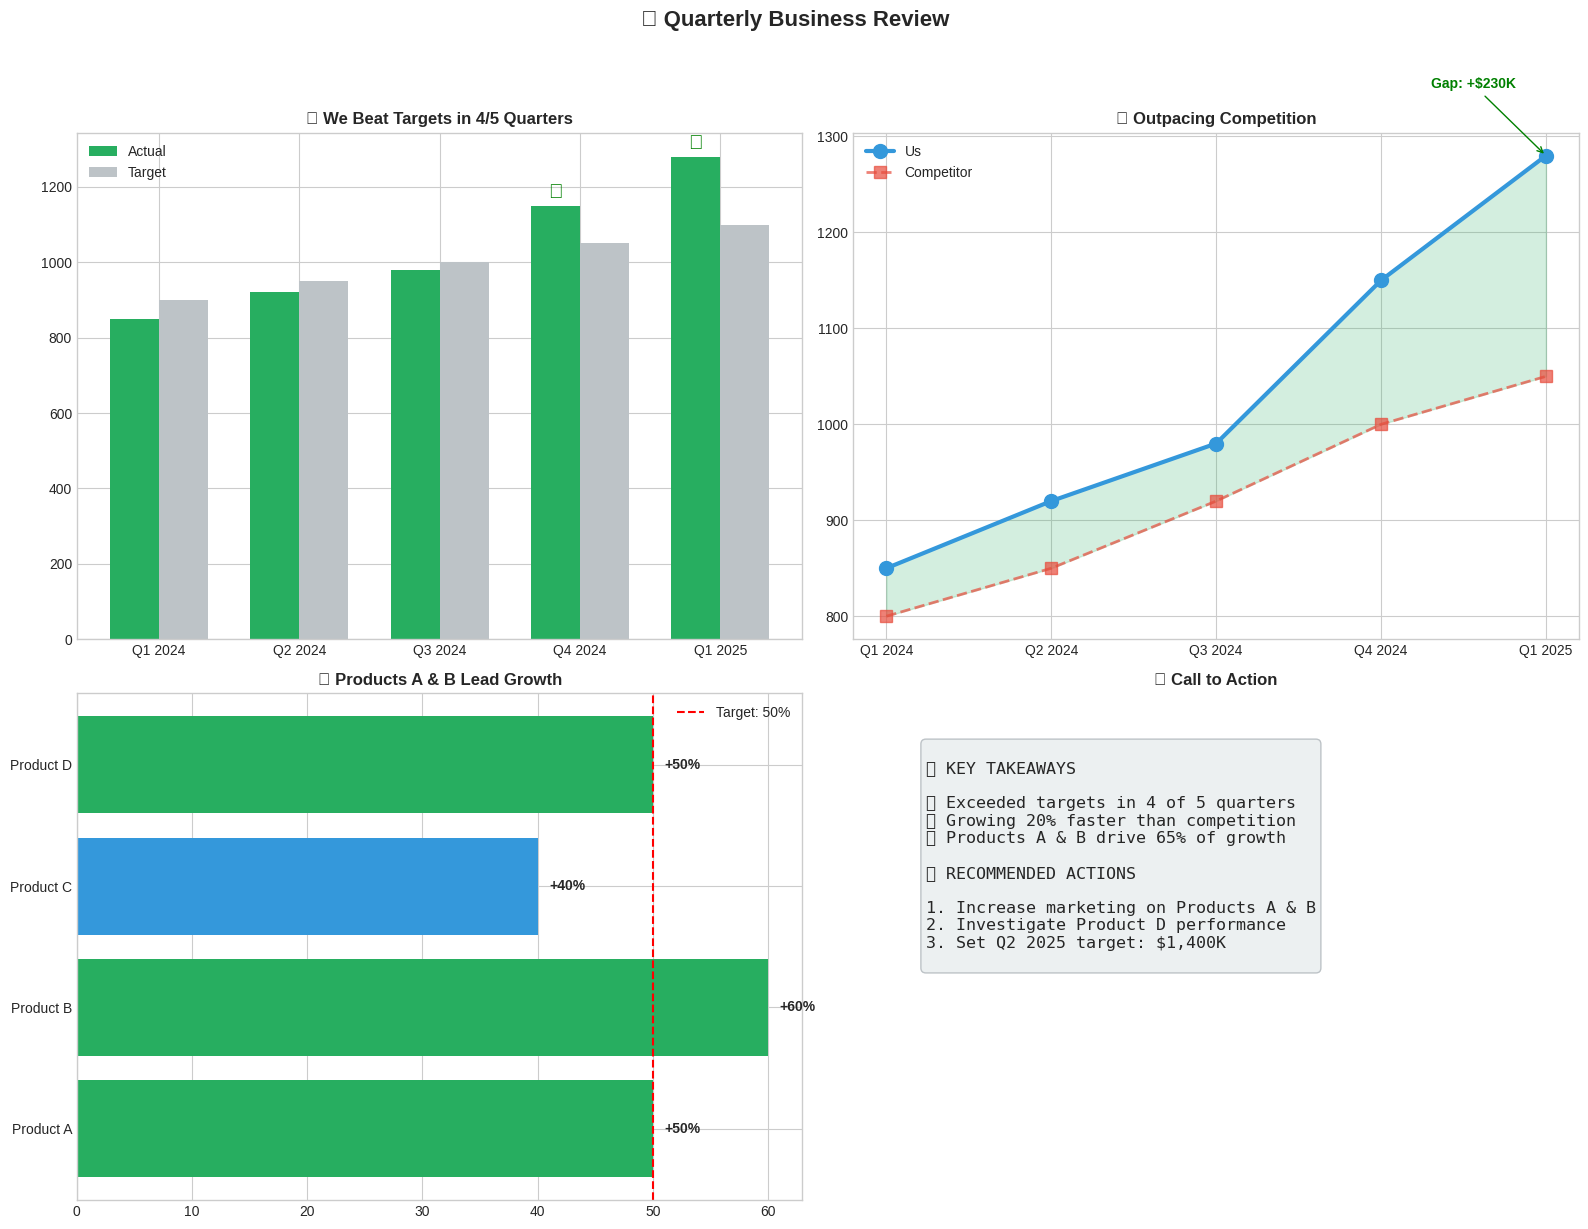

In [33]:
# Quarterly Business Review Dashboard
np.random.seed(42)

quarters = ['Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024', 'Q1 2025']
actual_sales = [850, 920, 980, 1150, 1280]
target_sales = [900, 950, 1000, 1050, 1100]
competitor_sales = [800, 850, 920, 1000, 1050]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Quarterly Business Review', fontsize=16, fontweight='bold', y=1.02)

# Panel 1: Target vs Actual
x = np.arange(len(quarters))
axes[0, 0].bar(x - 0.175, actual_sales, 0.35, label='Actual', color='#27ae60')
axes[0, 0].bar(x + 0.175, target_sales, 0.35, label='Target', color='#bdc3c7')
for i, (a, t) in enumerate(zip(actual_sales, target_sales)):
    if a > t: axes[0, 0].annotate('✓', (i - 0.175, a + 20), ha='center', color='green', fontsize=14)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(quarters)
axes[0, 0].set_title('🎯 We Beat Targets in 4/5 Quarters', fontweight='bold')
axes[0, 0].legend()

# Panel 2: Us vs Competition
axes[0, 1].plot(quarters, actual_sales, 'o-', linewidth=3, markersize=10, label='Us', color='#3498db')
axes[0, 1].plot(quarters, competitor_sales, 's--', linewidth=2, markersize=8, label='Competitor', color='#e74c3c', alpha=0.7)
axes[0, 1].fill_between(quarters, competitor_sales, actual_sales, alpha=0.2, color='#27ae60')
axes[0, 1].annotate('Gap: +$230K', (4, 1280), xytext=(3.3, 1350), fontweight='bold', color='green',
                    arrowprops=dict(arrowstyle='->', color='green'))
axes[0, 1].set_title('📈 Outpacing Competition', fontweight='bold')
axes[0, 1].legend()

# Panel 3: Growth by Product
products = ['Product A', 'Product B', 'Product C', 'Product D']
growth = [50, 60, 40, 50]
colors = ['#27ae60' if g >= 50 else '#3498db' for g in growth]
bars = axes[1, 0].barh(products, growth, color=colors)
axes[1, 0].axvline(50, color='red', linestyle='--', label='Target: 50%')
for bar, g in zip(bars, growth):
    axes[1, 0].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'+{g}%', va='center', fontweight='bold')
axes[1, 0].set_title('🚀 Products A & B Lead Growth', fontweight='bold')
axes[1, 0].legend()

# Panel 4: Key Takeaways
axes[1, 1].axis('off')
summary = """
📋 KEY TAKEAWAYS

✅ Exceeded targets in 4 of 5 quarters
✅ Growing 20% faster than competition
✅ Products A & B drive 65% of growth

🎯 RECOMMENDED ACTIONS

1. Increase marketing on Products A & B
2. Investigate Product D performance
3. Set Q2 2025 target: $1,400K
"""
axes[1, 1].text(0.1, 0.9, summary, transform=axes[1, 1].transAxes, fontsize=12,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='#ecf0f1', edgecolor='#bdc3c7'))
axes[1, 1].set_title('📝 Call to Action', fontweight='bold')

plt.tight_layout()
plt.show()

## Using Color Strategically

Color is one of the most powerful tools for guiding attention. Use it intentionally!

### 🎨 Three Color Strategies

| Strategy | When to Use | Example |
|----------|-------------|---------|
| **Highlight exceptions** | Show what's different | Gray bars + one red bar |
| **Sequential color** | Show magnitude | Light → Dark based on value |
| **Categorical color** | Group by category | Different color per quarter |

### ⚠️ Color Tips
- **Gray is your friend** - Use it for context/background data
- **Limit bright colors** - 1-2 bright colors for emphasis only
- **Consider colorblind users** - Avoid red/green alone, use patterns too

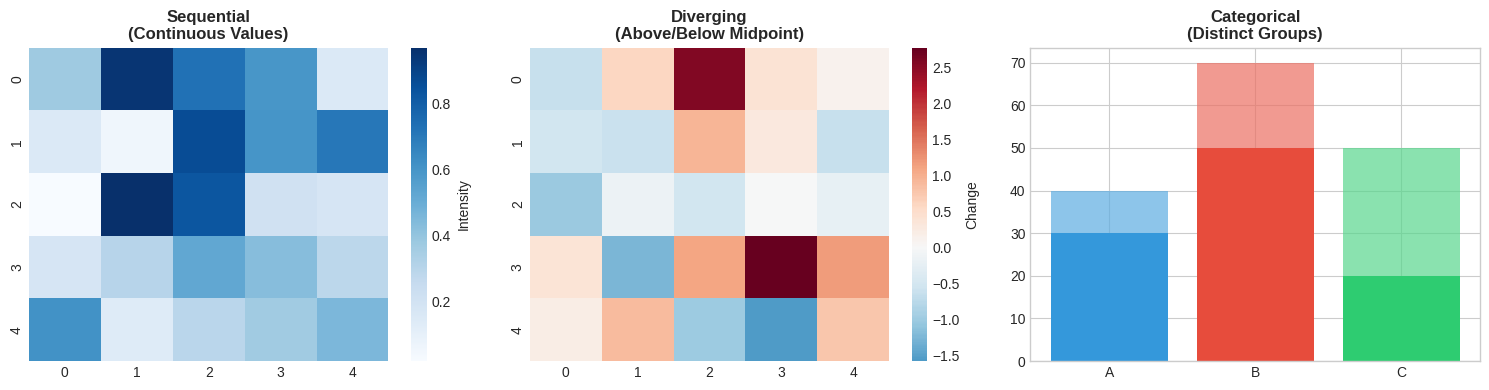

In [34]:
# Strategic Color Usage
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sequential (low-to-high)
data = np.random.rand(5, 5)
sns.heatmap(data, cmap='Blues', ax=axes[0], cbar_kws={'label': 'Intensity'})
axes[0].set_title('Sequential\n(Continuous Values)', fontweight='bold')

# Diverging (deviation from center)
data_diverging = np.random.randn(5, 5)
sns.heatmap(data_diverging, cmap='RdBu_r', center=0, ax=axes[1], cbar_kws={'label': 'Change'})
axes[1].set_title('Diverging\n(Above/Below Midpoint)', fontweight='bold')

# Categorical (distinct groups)
bars = axes[2].bar(['A', 'B', 'C'], [30, 50, 20], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[2].bar(['A', 'B', 'C'], [10, 20, 30], bottom=[30, 50, 20], color=['#5dade2', '#ec7063', '#58d68d'], alpha=0.7)
axes[2].set_title('Categorical\n(Distinct Groups)', fontweight='bold')

plt.tight_layout()
plt.show()

## Adding Annotations for Context

Annotations transform charts from "here's the data" to "here's what it means."

### 📝 Types of Annotations

| Type | Function | Use Case |
|------|----------|----------|
| **Text labels** | `ax.text()` | Add notes anywhere |
| **Arrows with text** | `ax.annotate()` | Point to specific data |
| **Reference lines** | `ax.axhline()`, `ax.axvline()` | Show targets/benchmarks |
| **Shaded regions** | `ax.axvspan()`, `ax.fill_between()` | Highlight periods |
| **Summary boxes** | `ax.text(..., bbox=dict())` | Key takeaways |

/tmp/ipykernel_86003/949603706.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


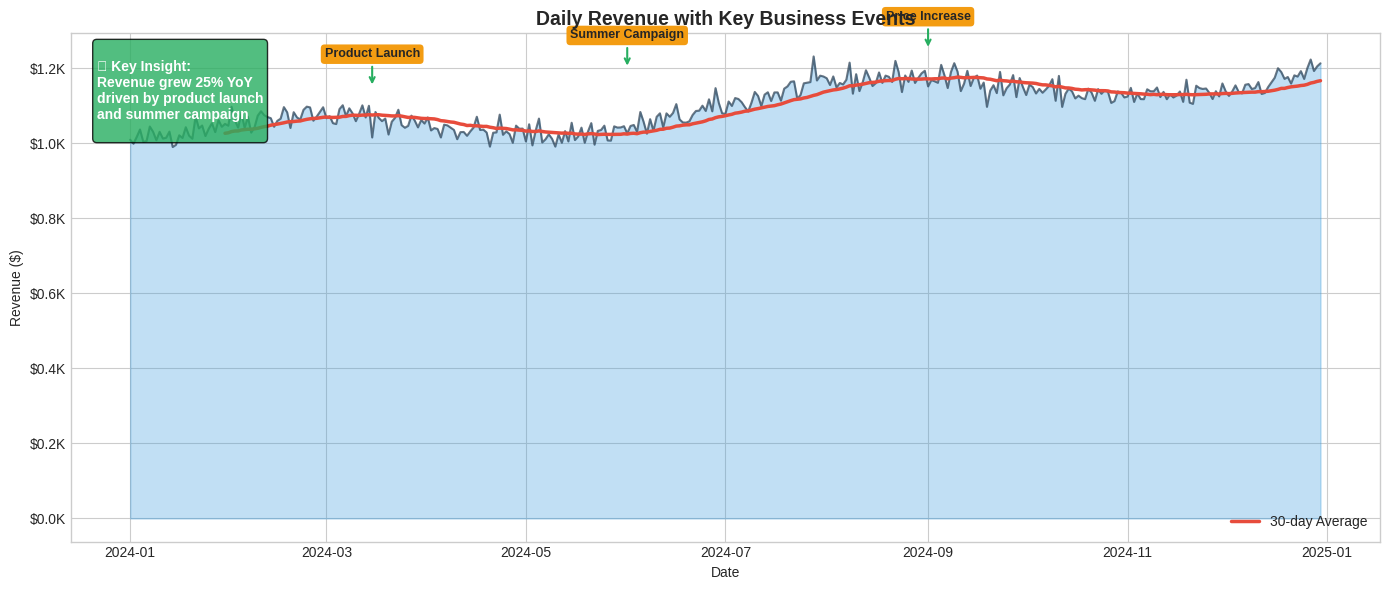

In [35]:
# Strategic Annotations
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=365, freq='D')
baseline = 1000
trend = np.linspace(0, 200, 365)
seasonality = 50 * np.sin(np.linspace(0, 4*np.pi, 365))
noise = np.random.randn(365) * 20
daily_revenue = baseline + trend + seasonality + noise

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dates, daily_revenue, linewidth=1.5, color='#2c3e50', alpha=0.7)
ax.fill_between(dates, daily_revenue, alpha=0.3, color='#3498db')

# Rolling average for clarity
rolling_avg = pd.Series(daily_revenue).rolling(30).mean()
ax.plot(dates, rolling_avg, linewidth=2.5, color='#e74c3c', label='30-day Average')

# Event annotations
events = [
    ('2024-03-15', 'Product Launch', 1150),
    ('2024-06-01', 'Summer Campaign', 1200),
    ('2024-09-01', 'Price Increase', 1250),
    ('2024-12-15', 'Holiday Peak', 1350),
]
for date, label, y in events:
    ax.annotate(label, xy=(pd.to_datetime(date), y), xytext=(pd.to_datetime(date), y + 80),
                fontweight='bold', fontsize=9, ha='center',
                arrowprops=dict(arrowstyle='->', color='#27ae60', lw=1.5),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='#f39c12', edgecolor='none'))

# Insight callout
insight_box = """
📈 Key Insight:
Revenue grew 25% YoY
driven by product launch
and summer campaign
"""
ax.text(0.02, 0.98, insight_box, transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#27ae60', alpha=0.8), color='white', fontweight='bold')

ax.set_title('Daily Revenue with Key Business Events', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue ($)')
ax.legend(loc='lower right')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000:.1f}K'))
plt.tight_layout()
plt.show()

---

# 6. Practice Projects

Now let's apply everything we've learned in two realistic projects!

## Project 1: Visual Exploratory Data Analysis (EDA)

### 🏪 Scenario: Retail Store Sales Analysis

You're a data analyst at a retail company. Your task is to explore sales data and create visualizations that answer key business questions:

1. **Which stores perform best?** (Composition - Pie chart)
2. **Which product categories drive revenue?** (Comparison - Bar chart)
3. **When do customers shop?** (Trend - Line & Heatmap)
4. **What affects spending?** (Relationship - Scatter, Box plots)

### Key Techniques Demonstrated:
- `GridSpec` for complex dashboard layouts
- Multiple chart types in one figure
- Adding annotations and insights
- Color strategies for emphasis

In [36]:
# Generate Retail Sales Dataset
np.random.seed(42)
n_records = 1000

retail_data = pd.DataFrame({
    'date': pd.date_range('2024-01-01', periods=n_records, freq='H'),
    'store': np.random.choice(['Downtown', 'Mall', 'Airport', 'Suburb'], n_records),
    'category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Home'], n_records),
    'quantity': np.random.poisson(5, n_records),
    'unit_price': np.random.uniform(10, 200, n_records),
    'customer_age': np.random.normal(35, 12, n_records).astype(int).clip(18, 80),
    'payment_method': np.random.choice(['Credit Card', 'Cash', 'Mobile Pay'], n_records, p=[0.6, 0.25, 0.15]),
})
retail_data['total_sale'] = retail_data['quantity'] * retail_data['unit_price']

print("📊 Retail Dataset Preview:")
print(retail_data.head())
print(f"\n📈 Dataset Shape: {retail_data.shape}")

📊 Retail Dataset Preview:
                 date     store     category  quantity  unit_price  \
0 2024-01-01 00:00:00   Airport     Clothing         8  152.247713   
1 2024-01-01 01:00:00    Suburb         Food         4  167.305741   
2 2024-01-01 02:00:00  Downtown  Electronics         5  156.536184   
3 2024-01-01 03:00:00   Airport  Electronics        10   17.374460   
4 2024-01-01 04:00:00   Airport  Electronics         3   46.884466   

   customer_age payment_method   total_sale  
0            36           Cash  1217.981706  
1            37    Credit Card   669.222965  
2            46    Credit Card   782.680920  
3            47    Credit Card   173.744601  
4            27    Credit Card   140.653399  

📈 Dataset Shape: (1000, 8)


/tmp/ipykernel_86003/142390326.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'date': pd.date_range('2024-01-01', periods=n_records, freq='H'),


/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


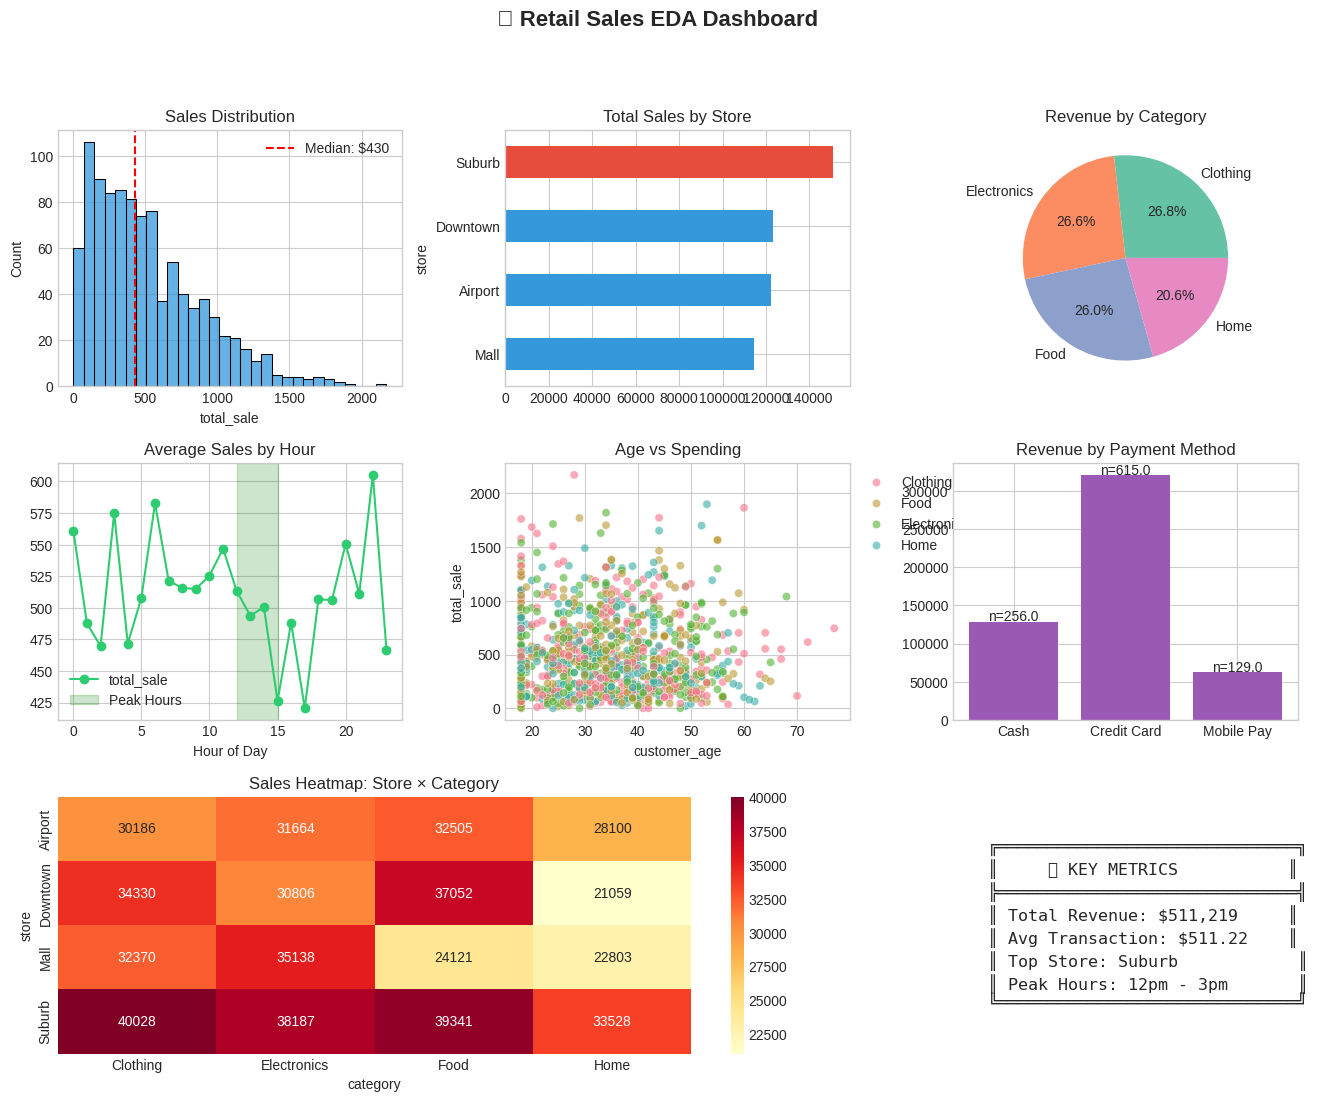

In [37]:
# Retail EDA Dashboard
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)
fig.suptitle('🛒 Retail Sales EDA Dashboard', fontsize=16, fontweight='bold')

# 1. Sales Distribution
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(data=retail_data, x='total_sale', bins=30, ax=ax1, color='#3498db')
ax1.axvline(retail_data['total_sale'].median(), color='red', linestyle='--', label=f"Median: ${retail_data['total_sale'].median():.0f}")
ax1.set_title('Sales Distribution')
ax1.legend()

# 2. Sales by Store
ax2 = fig.add_subplot(gs[0, 1])
store_sales = retail_data.groupby('store')['total_sale'].sum().sort_values(ascending=True)
store_sales.plot(kind='barh', ax=ax2, color=['#e74c3c' if s == store_sales.max() else '#3498db' for s in store_sales])
ax2.set_title('Total Sales by Store')

# 3. Category Breakdown
ax3 = fig.add_subplot(gs[0, 2])
retail_data.groupby('category')['total_sale'].sum().plot(kind='pie', autopct='%1.1f%%', ax=ax3, colors=sns.color_palette('Set2'))
ax3.set_ylabel('')
ax3.set_title('Revenue by Category')

# 4. Hourly Sales Pattern
ax4 = fig.add_subplot(gs[1, 0])
retail_data.groupby(retail_data['date'].dt.hour)['total_sale'].mean().plot(ax=ax4, marker='o', color='#2ecc71')
ax4.axvspan(12, 15, alpha=0.2, color='green', label='Peak Hours')
ax4.set_title('Average Sales by Hour')
ax4.set_xlabel('Hour of Day')
ax4.legend()

# 5. Age vs Spending
ax5 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=retail_data, x='customer_age', y='total_sale', hue='category', alpha=0.6, ax=ax5)
ax5.set_title('Age vs Spending')
ax5.legend(bbox_to_anchor=(1, 1), loc='upper left')

# 6. Payment Methods
ax6 = fig.add_subplot(gs[1, 2])
payment_data = retail_data.groupby('payment_method')['total_sale'].agg(['sum', 'count'])
ax6.bar(payment_data.index, payment_data['sum'], color='#9b59b6')
for i, (method, row) in enumerate(payment_data.iterrows()):
    ax6.text(i, row['sum'] + 1000, f"n={row['count']}", ha='center')
ax6.set_title('Revenue by Payment Method')

# 7. Store-Category Heatmap
ax7 = fig.add_subplot(gs[2, :2])
pivot = retail_data.pivot_table(values='total_sale', index='store', columns='category', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax7)
ax7.set_title('Sales Heatmap: Store × Category')

# 8. Key Metrics Summary
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')
total_rev = retail_data['total_sale'].sum()
avg_trans = retail_data['total_sale'].mean()
top_store = store_sales.idxmax()
summary = f"""
╔══════════════════════════════╗
║     📊 KEY METRICS           ║
╠══════════════════════════════╣
║ Total Revenue: ${total_rev:,.0f}     ║
║ Avg Transaction: ${avg_trans:.2f}    ║
║ Top Store: {top_store}            ║
║ Peak Hours: 12pm - 3pm       ║
╚══════════════════════════════╝
"""
ax8.text(0.1, 0.5, summary, fontsize=12, fontfamily='monospace', transform=ax8.transAxes, va='center')

plt.show()

## Project 2: Creating an Executive Summary Report

### 📊 Scenario: Present Key Findings to Leadership

Executives don't have time to explore dashboards. They need:
- **Clear KPIs** at a glance
- **Key trends** highlighted
- **Actionable insights** stated directly

### Executive Report Design Principles:
1. **Lead with numbers** - KPI cards at the top
2. **Show trends** - Are we improving?
3. **Highlight action items** - What to do next
4. **Minimize clutter** - Every element must earn its place

/tmp/ipykernel_86003/1524457381.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hussam/miniconda3/envs/py_kurs/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s)

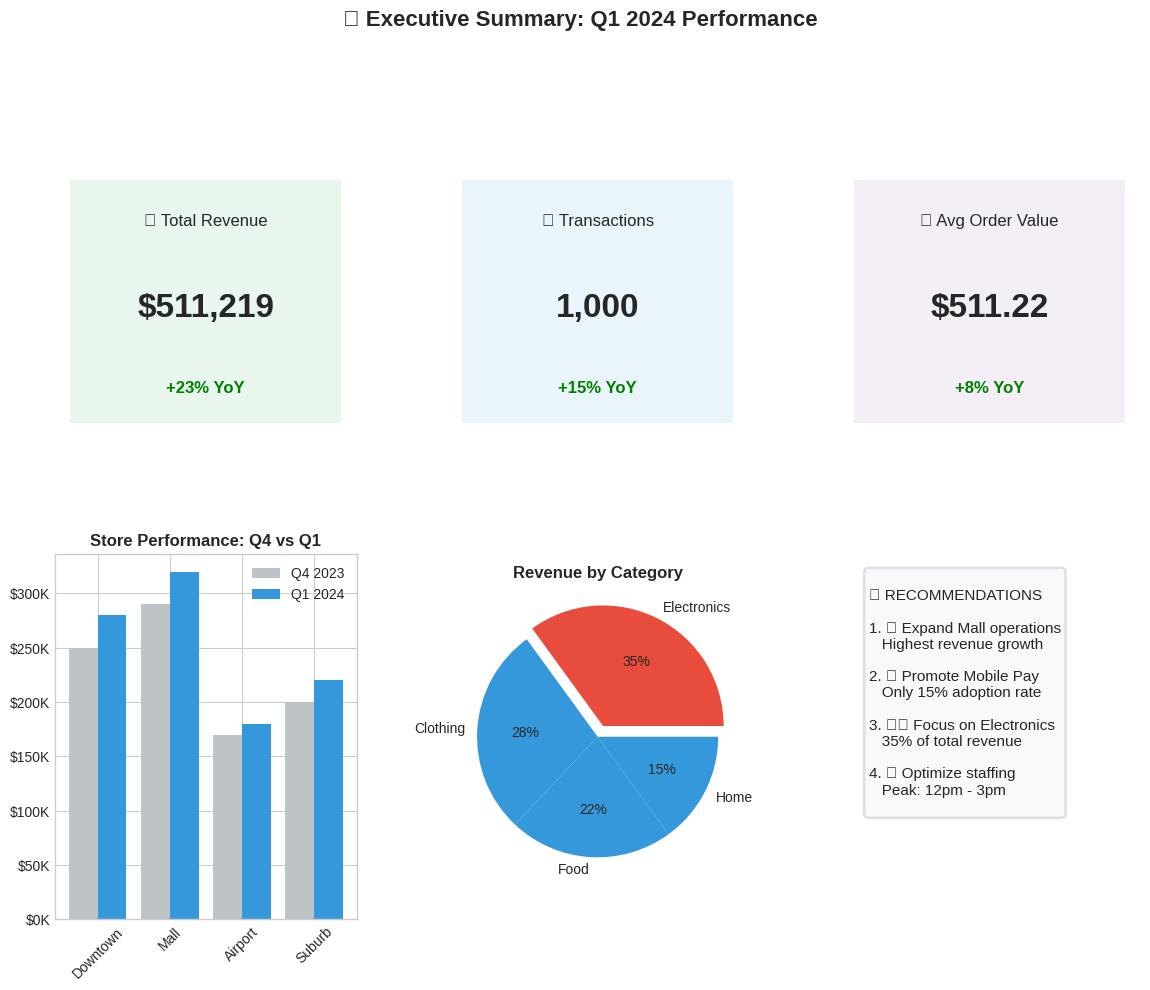

In [38]:
# Executive Summary Report
fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 3, figure=fig, height_ratios=[1, 1.2], hspace=0.3, wspace=0.3)
fig.suptitle('📈 Executive Summary: Q1 2024 Performance', fontsize=16, fontweight='bold', y=1.02)

# KPI Cards (top row)
kpis = [
    ('💰 Total Revenue', f'${total_rev:,.0f}', '+23% YoY', '#27ae60'),
    ('🛒 Transactions', f'{len(retail_data):,}', '+15% YoY', '#3498db'),
    ('📊 Avg Order Value', f'${avg_trans:.2f}', '+8% YoY', '#9b59b6'),
]

for i, (title, value, change, color) in enumerate(kpis):
    ax = fig.add_subplot(gs[0, i])
    ax.axis('off')
    ax.add_patch(plt.Rectangle((0.05, 0.1), 0.9, 0.8, facecolor=color, alpha=0.1, transform=ax.transAxes))
    ax.text(0.5, 0.75, title, ha='center', fontsize=12, transform=ax.transAxes)
    ax.text(0.5, 0.45, value, ha='center', fontsize=24, fontweight='bold', transform=ax.transAxes)
    ax.text(0.5, 0.2, change, ha='center', fontsize=12, color='green', fontweight='bold', transform=ax.transAxes)

# Store Performance Comparison
ax_stores = fig.add_subplot(gs[1, 0])
stores = ['Downtown', 'Mall', 'Airport', 'Suburb']
q1_sales = [280000, 320000, 180000, 220000]
q4_sales = [250000, 290000, 170000, 200000]
x = np.arange(len(stores))
ax_stores.bar(x - 0.2, q4_sales, 0.4, label='Q4 2023', color='#bdc3c7')
ax_stores.bar(x + 0.2, q1_sales, 0.4, label='Q1 2024', color='#3498db')
ax_stores.set_xticks(x)
ax_stores.set_xticklabels(stores, rotation=45)
ax_stores.set_title('Store Performance: Q4 vs Q1', fontweight='bold')
ax_stores.legend()
ax_stores.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Category Trend
ax_cat = fig.add_subplot(gs[1, 1])
categories = ['Electronics', 'Clothing', 'Food', 'Home']
values = [35, 28, 22, 15]
colors = ['#e74c3c' if v == max(values) else '#3498db' for v in values]
wedges, texts, autotexts = ax_cat.pie(values, labels=categories, autopct='%1.0f%%', colors=colors, explode=[0.1 if v == max(values) else 0 for v in values])
ax_cat.set_title('Revenue by Category', fontweight='bold')

# Recommendations
ax_rec = fig.add_subplot(gs[1, 2])
ax_rec.axis('off')
recommendations = """
📋 RECOMMENDATIONS

1. 🎯 Expand Mall operations
   Highest revenue growth

2. 📱 Promote Mobile Pay
   Only 15% adoption rate

3. 🛍️ Focus on Electronics
   35% of total revenue

4. ⏰ Optimize staffing
   Peak: 12pm - 3pm
"""
ax_rec.text(0.1, 0.95, recommendations, transform=ax_rec.transAxes, fontsize=11, va='top',
            bbox=dict(boxstyle='round', facecolor='#f8f9fa', edgecolor='#dee2e6', linewidth=2))

plt.tight_layout()
plt.show()

---

## 💾 Saving Visualizations

Once you've created a visualization, you'll want to save it for presentations, reports, or web pages.

### 📁 Export Formats Comparison

| Format | Best For | Scalable | File Size | Syntax |
|--------|----------|----------|-----------|--------|
| **PNG** | Presentations, Documents | ❌ | Medium-Large | `fig.savefig('chart.png', dpi=300)` |
| **PDF** | Print, Academic papers | ✅ Vector | Small | `fig.savefig('chart.pdf')` |
| **SVG** | Web, Interactive | ✅ Vector | Very Small | `fig.savefig('chart.svg')` |
| **JPEG** | Photos, Email | ❌ | Small | `fig.savefig('chart.jpg', quality=95)` |

### 🔧 Key Parameters

| Parameter | Description | Typical Values |
|-----------|-------------|----------------|
| `dpi` | Resolution (dots per inch) | `72` (screen), `150` (web), `300` (print) |
| `bbox_inches` | Remove whitespace | `'tight'` (recommended) |
| `transparent` | Transparent background | `True` / `False` |
| `facecolor` | Background color | `'white'`, `'#f5f5f5'` |
| `quality` | JPEG compression | `95` (high), `85` (medium) |

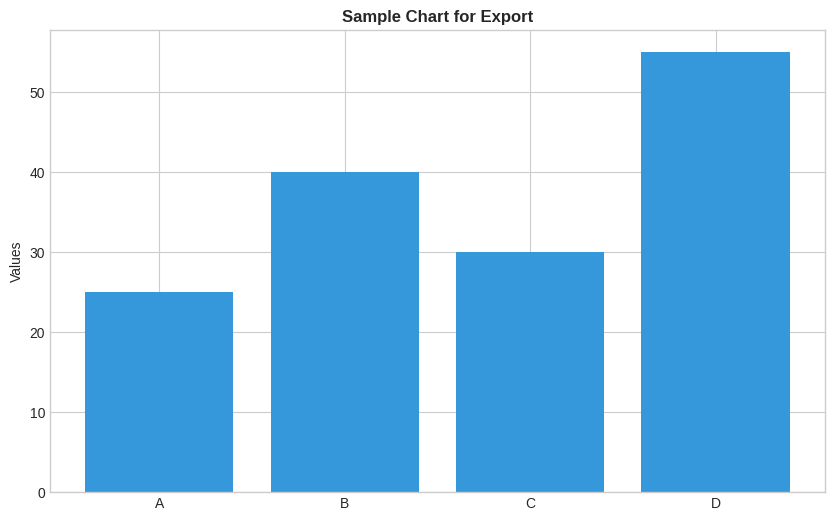

✅ Use fig.savefig() with appropriate format and DPI for your use case


In [39]:
# Create Sample Chart for Export
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['A', 'B', 'C', 'D'], [25, 40, 30, 55], color='#3498db')
ax.set_title('Sample Chart for Export', fontweight='bold')
ax.set_ylabel('Values')

# ══════════════════════════════════════════════════════════════
# UNCOMMENT TO SAVE - Examples for each format
# ══════════════════════════════════════════════════════════════

# High-resolution PNG for presentations
# fig.savefig('chart.png', dpi=300, bbox_inches='tight')

# PDF for print/academic papers
# fig.savefig('chart.pdf', bbox_inches='tight')

# SVG for web
# fig.savefig('chart.svg', bbox_inches='tight')

# JPEG with compression
# fig.savefig('chart.jpg', dpi=150, quality=95)

# PNG with transparent background
# fig.savefig('chart_transparent.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

print("✅ Use fig.savefig() with appropriate format and DPI for your use case")

---

# 📝 Summary & Key Takeaways

## What You Learned in This Unit:

### 1. 📊 Visualization Fundamentals
- Data visualization transforms numbers into insights humans can understand
- The 4 principles: **Clarity, Accuracy, Efficiency, Aesthetics**
- Anscombe's Quartet proved: always visualize—statistics alone can mislead!

### 2. 🎨 Matplotlib - The Foundation
| Chart Type | Function | Best For |
|------------|----------|----------|
| Line Plot | `ax.plot()` | Trends over time |
| Bar Chart | `ax.bar()` / `ax.barh()` | Category comparison |
| Scatter Plot | `ax.scatter()` | Relationships |
| Histogram | `ax.hist()` | Distribution |
| Pie Chart | `ax.pie()` | Composition (≤7 slices) |
| Box Plot | `ax.boxplot()` | Distribution + outliers |

### 3. 📈 Seaborn - Statistical Visualization
| Category | Functions | Use Cases |
|----------|-----------|-----------|
| Distribution | `histplot()`, `kdeplot()`, `boxplot()`, `violinplot()` | How is data spread? |
| Relationship | `scatterplot()`, `regplot()`, `pairplot()` | Are variables related? |
| Categorical | `barplot()`, `countplot()`, `stripplot()` | Compare categories |
| Matrix | `heatmap()`, `clustermap()` | Correlations, patterns |

### 4. 🎯 Choosing the Right Chart
- **Comparison** → Bar charts
- **Trend** → Line charts  
- **Relationship** → Scatter plots
- **Distribution** → Histograms, box plots
- **Composition** → Pie/donut charts (sparingly!)

### 5. 📖 Storytelling with Data
- **Lead with insight** → Title should state the finding
- **Use color strategically** → Gray for context, bright for emphasis
- **Add annotations** → `ax.annotate()`, `ax.axvline()`, `ax.text()`
- **Remove clutter** → Every element must earn its place

---

## 🎓 Key Commands Cheat Sheet

```python
# SETUP
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))

# MATPLOTLIB BASICS
ax.plot(x, y)           # Line chart
ax.bar(x, y)            # Vertical bars
ax.barh(y, width)       # Horizontal bars
ax.scatter(x, y)        # Scatter plot
ax.hist(data, bins=20)  # Histogram
ax.pie(sizes)           # Pie chart

# CUSTOMIZATION
ax.set_title('Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.legend()
ax.grid(True, alpha=0.3)

# ANNOTATIONS
ax.annotate('Text', xy=(x,y), xytext=(x2,y2), arrowprops=dict(arrowstyle='->'))
ax.axhline(y=value)     # Horizontal line
ax.axvline(x=value)     # Vertical line
ax.text(x, y, 'Text')   # Add text anywhere

# SEABORN
sns.histplot(data, kde=True)
sns.boxplot(data=df, x='cat', y='val')
sns.scatterplot(data=df, x='x', y='y', hue='group')
sns.heatmap(matrix, annot=True, cmap='coolwarm')
sns.pairplot(df, hue='species')

# SAVING
fig.savefig('chart.png', dpi=300, bbox_inches='tight')
```

---

## 🏋️ Practice Exercises

Try these on your own to reinforce what you learned:

1. **Basic**: Create a bar chart comparing 5 products' sales, with the highest bar highlighted in a different color

2. **Intermediate**: Using the tips dataset (`sns.load_dataset('tips')`), create a FacetGrid showing tip distribution by day and time

3. **Advanced**: Create an executive dashboard for a dataset of your choice with:
   - 3+ KPI cards
   - At least 4 different chart types
   - Strategic use of color
   - Annotations highlighting key insights

4. **Challenge**: Recreate one visualization from a news article or report you find online

---

## 📚 Additional Resources

- **Matplotlib Gallery**: https://matplotlib.org/stable/gallery/
- **Seaborn Tutorial**: https://seaborn.pydata.org/tutorial.html
- **Storytelling with Data (book)**: Cole Nussbaumer Knaflic
- **Data Visualization Catalogue**: https://datavizcatalogue.com/

---

**🎉 Congratulations!** You now have the skills to turn any dataset into compelling, professional visualizations that tell a story and drive action.